<div style="text-align: center; border: 2px solid #3d59c6; padding: 20px; border-radius: 10px; background-color: #ffffff;">
    <h1 style="color: #3d59c6; margin-bottom: 5px;">MD004: Estadística</h1>
    <h2 style="color: #000000; margin-top: 0;">AC07: Análisis de Entropía y Modelado Predictivo</h2>
    <hr style="border: 1px solid #3d59c6; width: 50%; margin: 20px auto;">
    <p style="font-size: 16px; color: #000000;">
        <strong>Alumno:</strong> Gerard Pascual Fontanilles <br>
        <strong>Fecha:</strong> 28/01/2026
    </p>
</div>

## <font color='#3d59c6'>  0. CARGA DE PACKAGES </font>

In [1]:
library(tidyverse)
library(ggplot2)
library(gridExtra)
library(infotheo)
library(corrplot)
library(factoextra)
library(FSelectorRcpp)
library(ggplot2)
library(gridExtra)
library(FactoMineR)
library(caret)
library(pROC)
library(e1071)
library(randomForest)
install.packages("kernlab")
library(kernlab)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


corrplot 0.95 loaded

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


Attaching package: ‘FSelectorRcpp’


The following object is masked from ‘package:infotheo’:

    discretize


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


Type 'citation("pROC")

## <font color='#3d59c6'>  1. CARGA DE DATOS </font>

In [2]:
df_seeds <- read.csv("20260120_Semillas_calabaza.csv")

In [3]:
head(df_seeds)

,X,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,1,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
2,2,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
3,3,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
4,4,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
5,5,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
6,6,73191,1041.460,405.8132,231.4261,73969,305.2698,0.8215,0.9895,0.7165,0.8480,1.7535,0.7522,Çerçevelik


Eliminamos la columna 'X' ya que no aporta nada relevante.

In [4]:
df_seeds$X <- NULL

In [5]:
str(df_seeds)

'data.frame':	2500 obs. of  13 variables:
 $ Area             : int  56276 76631 71623 66458 66107 73191 73338 69692 95727 73465 ...
 $ Perimeter        : num  888 1068 1083 992 998 ...
 $ Major_Axis_Length: num  326 417 436 382 384 ...
 $ Minor_Axis_Length: num  220 234 211 223 220 ...
 $ Convex_Area      : int  56831 77280 72663 67118 67117 73969 73859 70442 96831 74089 ...
 $ Equiv_Diameter   : num  268 312 302 291 290 ...
 $ Eccentricity     : num  0.738 0.828 0.875 0.812 0.819 ...
 $ Solidity         : num  0.99 0.992 0.986 0.99 0.985 ...
 $ Extent           : num  0.745 0.715 0.74 0.74 0.675 ...
 $ Roundness        : num  0.896 0.844 0.767 0.849 0.834 ...
 $ Aspect_Ration    : num  1.48 1.78 2.07 1.71 1.74 ...
 $ Compactness      : num  0.821 0.749 0.693 0.762 0.756 ...
 $ Class            : chr  "Çerçevelik" "Çerçevelik" "Çerçevelik" "Çerçevelik" ...


In [6]:
cat("Dimensiones del dataset:", dim(df_seeds), "\n")
cat("Valores nulos por columna:\n")
print(colSums(is.na(df_seeds)))

Dimensiones del dataset: 2500 13 
Valores nulos por columna:
             Area         Perimeter Major_Axis_Length Minor_Axis_Length 
                0                 0                 0                 0 
      Convex_Area    Equiv_Diameter      Eccentricity          Solidity 
                0                 0                 0                 0 
           Extent         Roundness     Aspect_Ration       Compactness 
                0                 0                 0                 0 
            Class 
                0 


## <font color='#3d59c6'>  2. REALIZAR ANÁLISIS DESCRIPTIVO </font>

In [7]:
summary(df_seeds)
table(df_seeds$Class)

      Area          Perimeter      Major_Axis_Length Minor_Axis_Length
 Min.   : 47939   Min.   : 868.5   Min.   :320.8     Min.   :152.2    
 1st Qu.: 70765   1st Qu.:1048.8   1st Qu.:415.0     1st Qu.:211.2    
 Median : 79076   Median :1123.7   Median :449.5     Median :224.7    
 Mean   : 80658   Mean   :1130.3   Mean   :456.6     Mean   :225.8    
 3rd Qu.: 89758   3rd Qu.:1203.3   3rd Qu.:492.7     3rd Qu.:240.7    
 Max.   :136574   Max.   :1559.5   Max.   :661.9     Max.   :305.8    
  Convex_Area     Equiv_Diameter   Eccentricity       Solidity     
 Min.   : 48366   Min.   :247.1   Min.   :0.4921   Min.   :0.9186  
 1st Qu.: 71512   1st Qu.:300.2   1st Qu.:0.8317   1st Qu.:0.9883  
 Median : 79872   Median :317.3   Median :0.8637   Median :0.9903  
 Mean   : 81508   Mean   :319.3   Mean   :0.8609   Mean   :0.9895  
 3rd Qu.: 90798   3rd Qu.:338.1   3rd Qu.:0.8970   3rd Qu.:0.9915  
 Max.   :138384   Max.   :417.0   Max.   :0.9481   Max.   :0.9944  
     Extent         Roundne


   Çerçevelik Ürgüp Sivrisi 
         1300          1200 

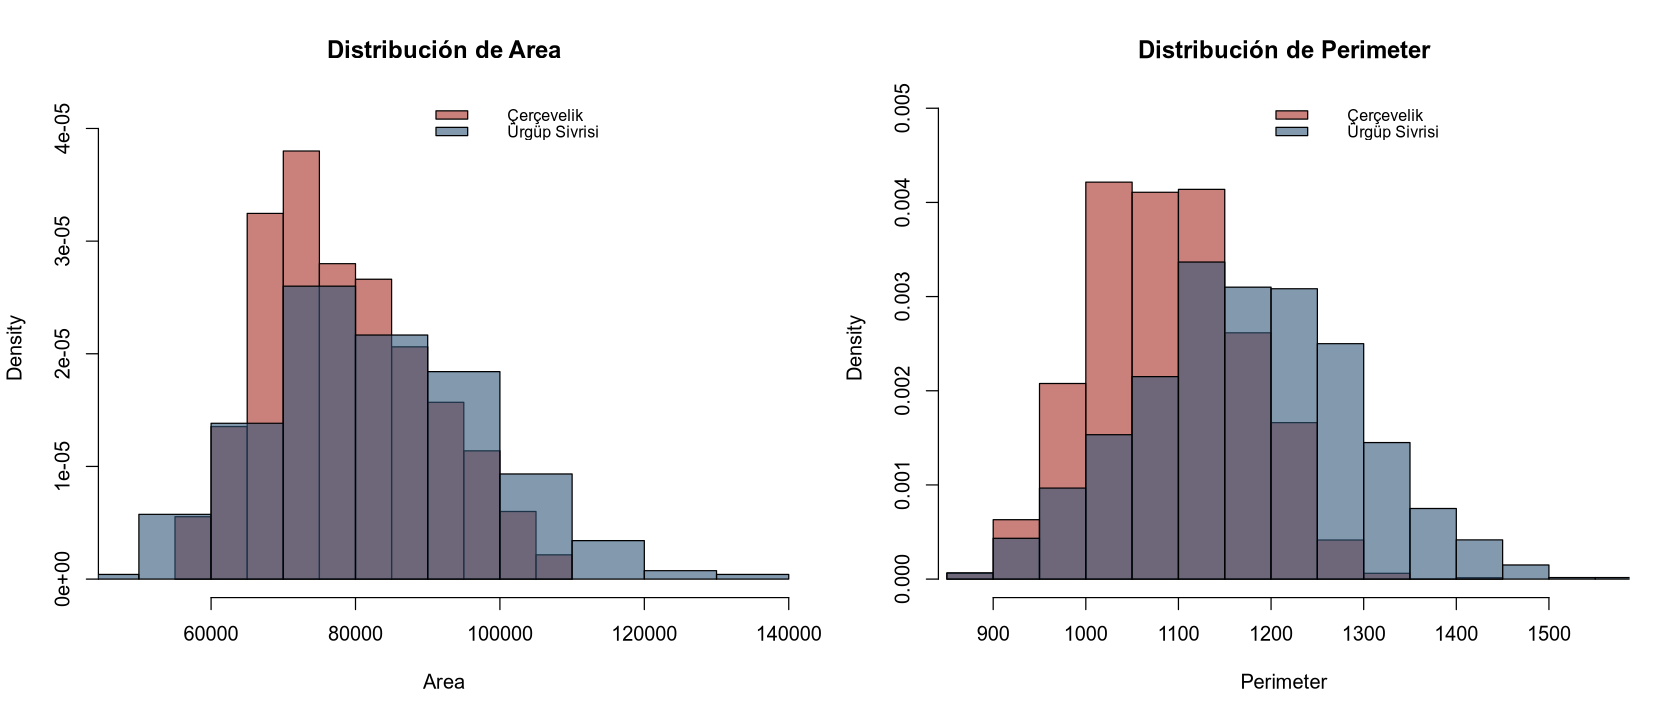

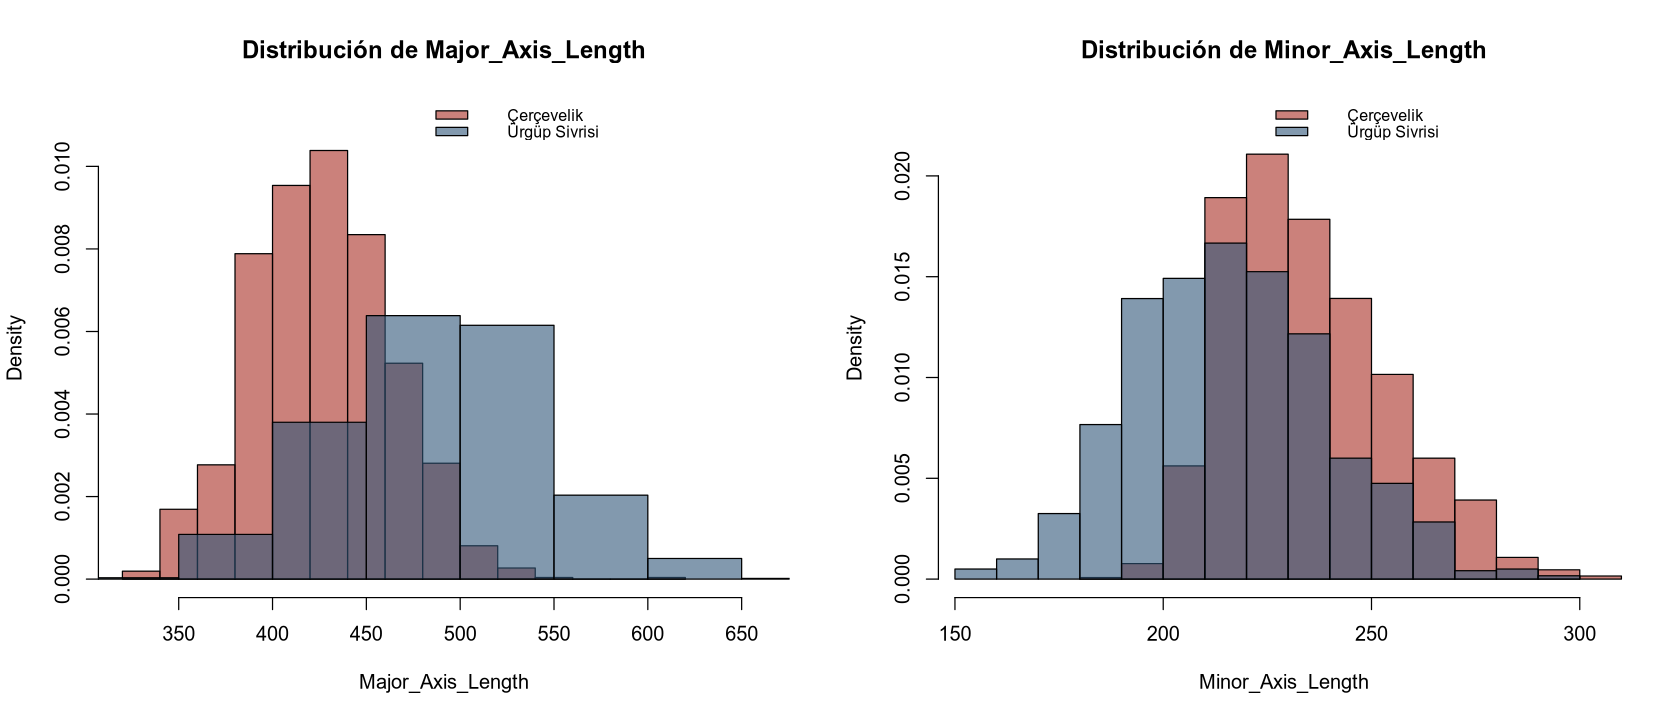

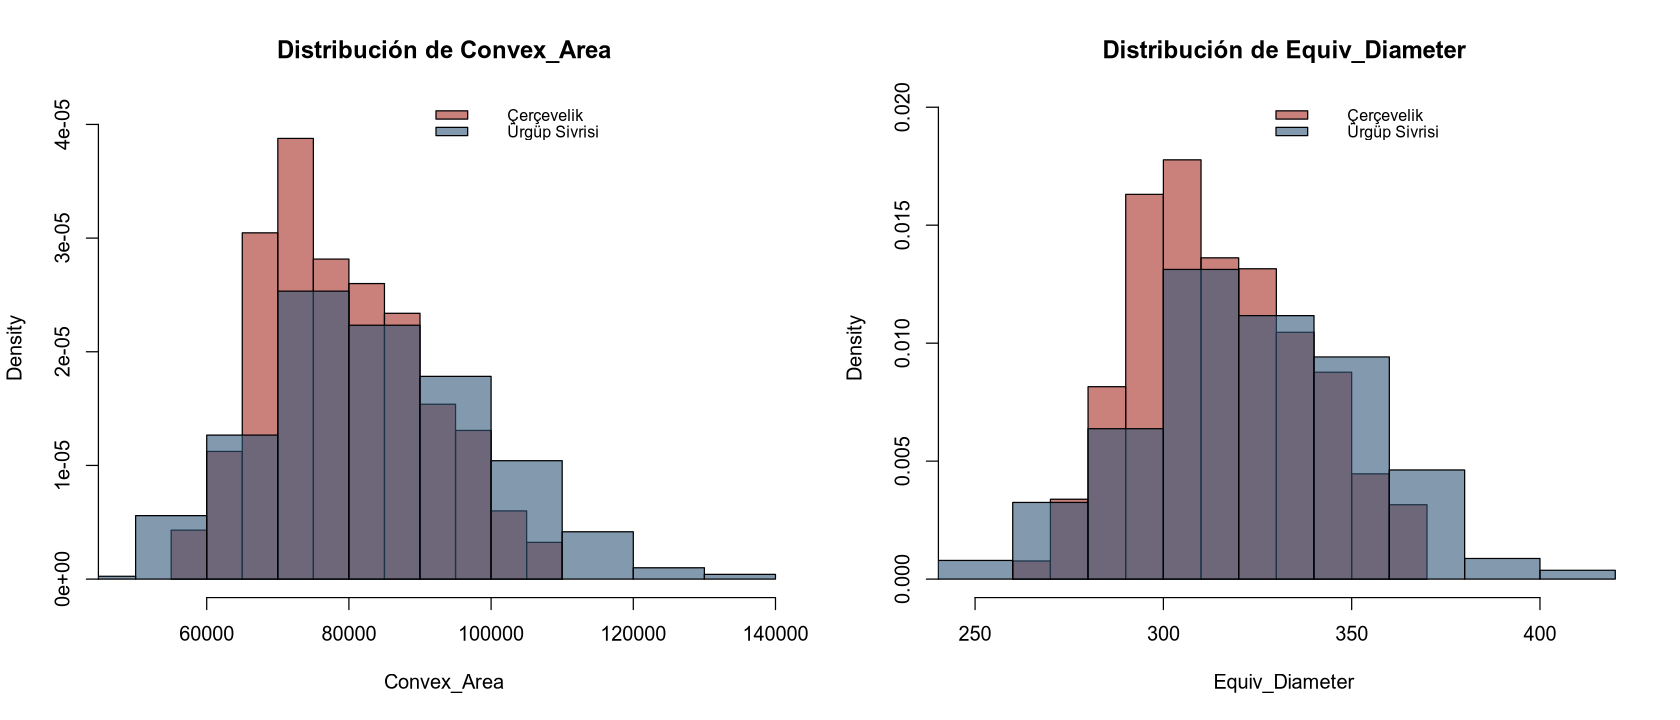

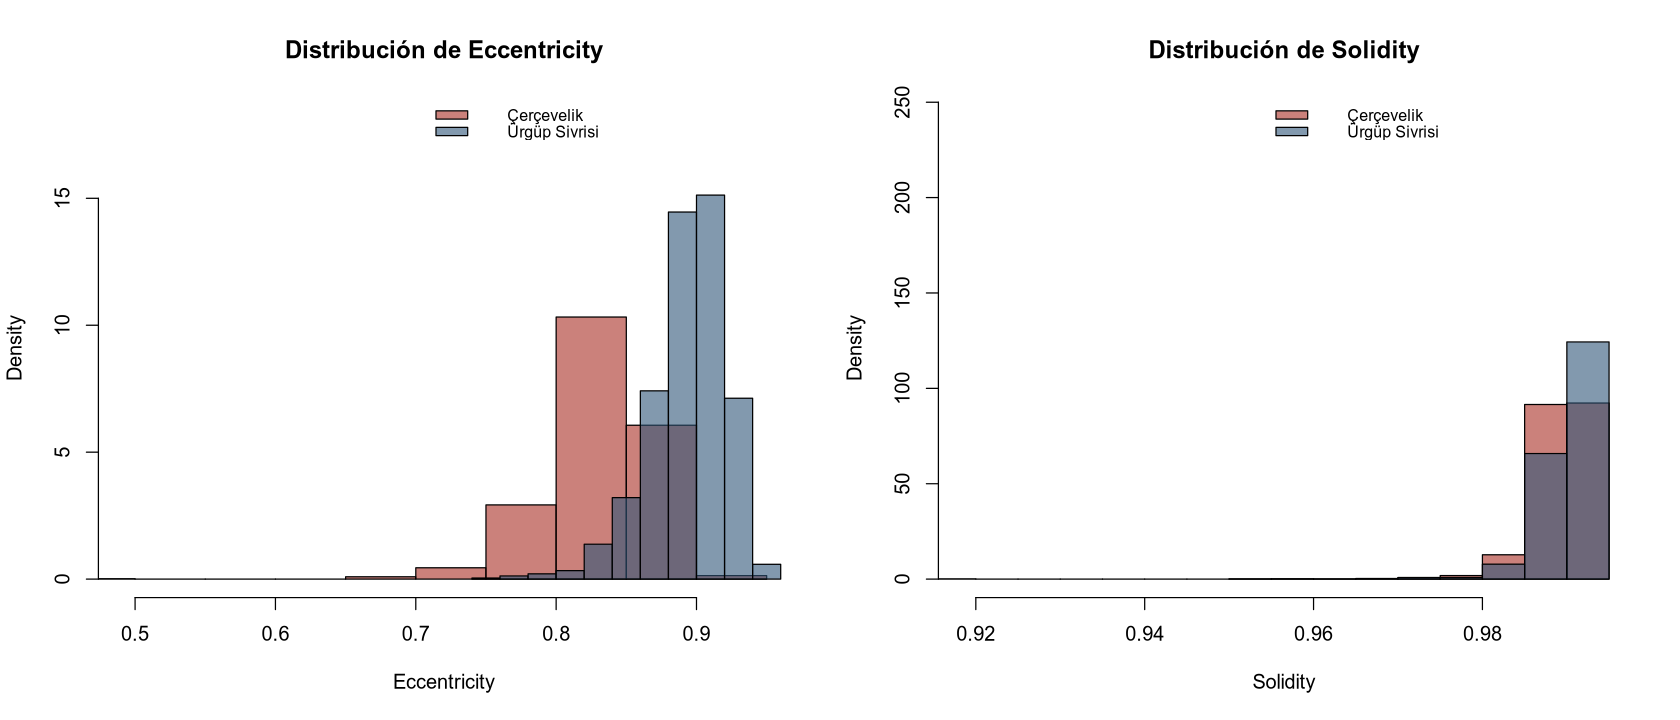

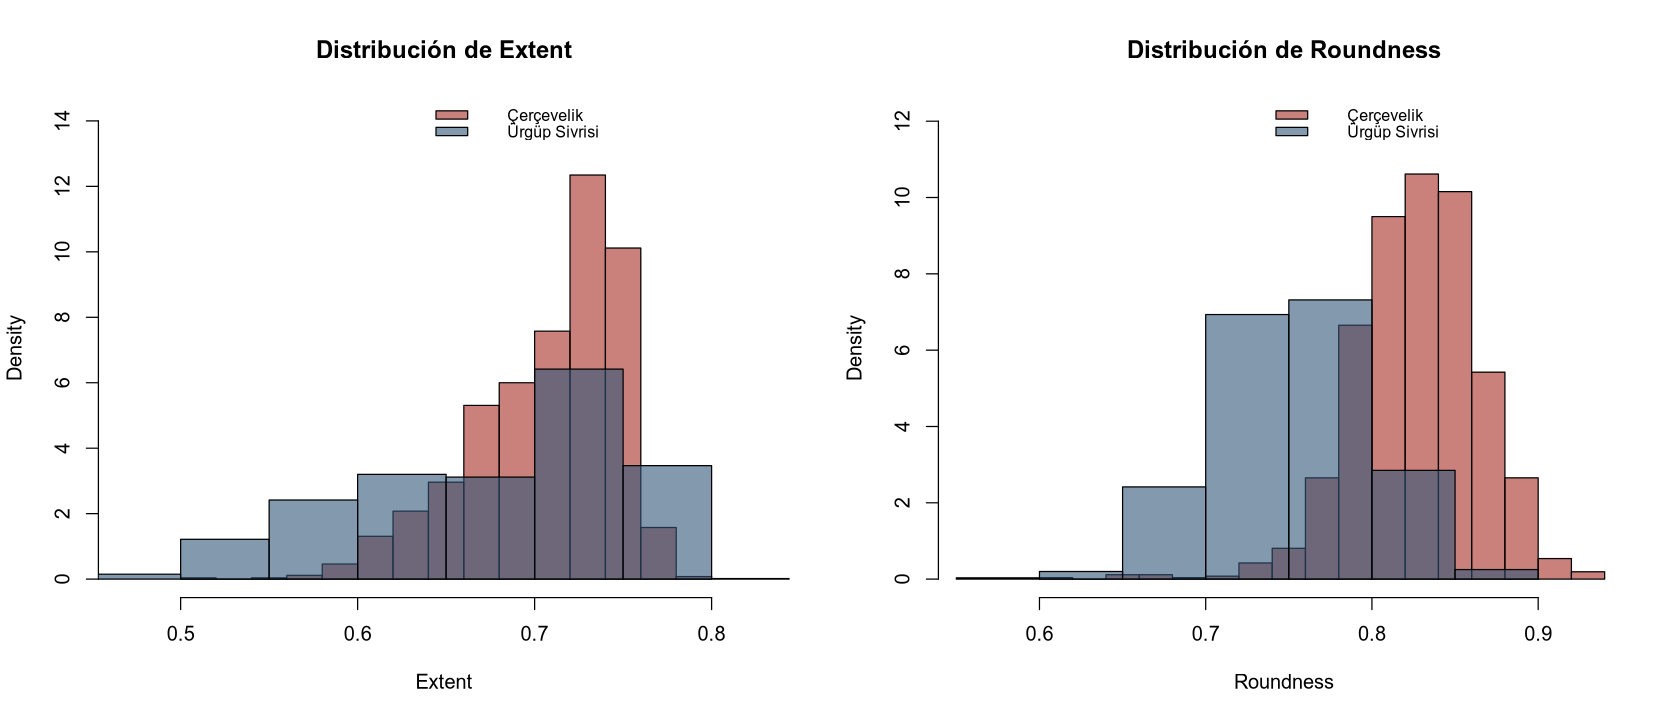

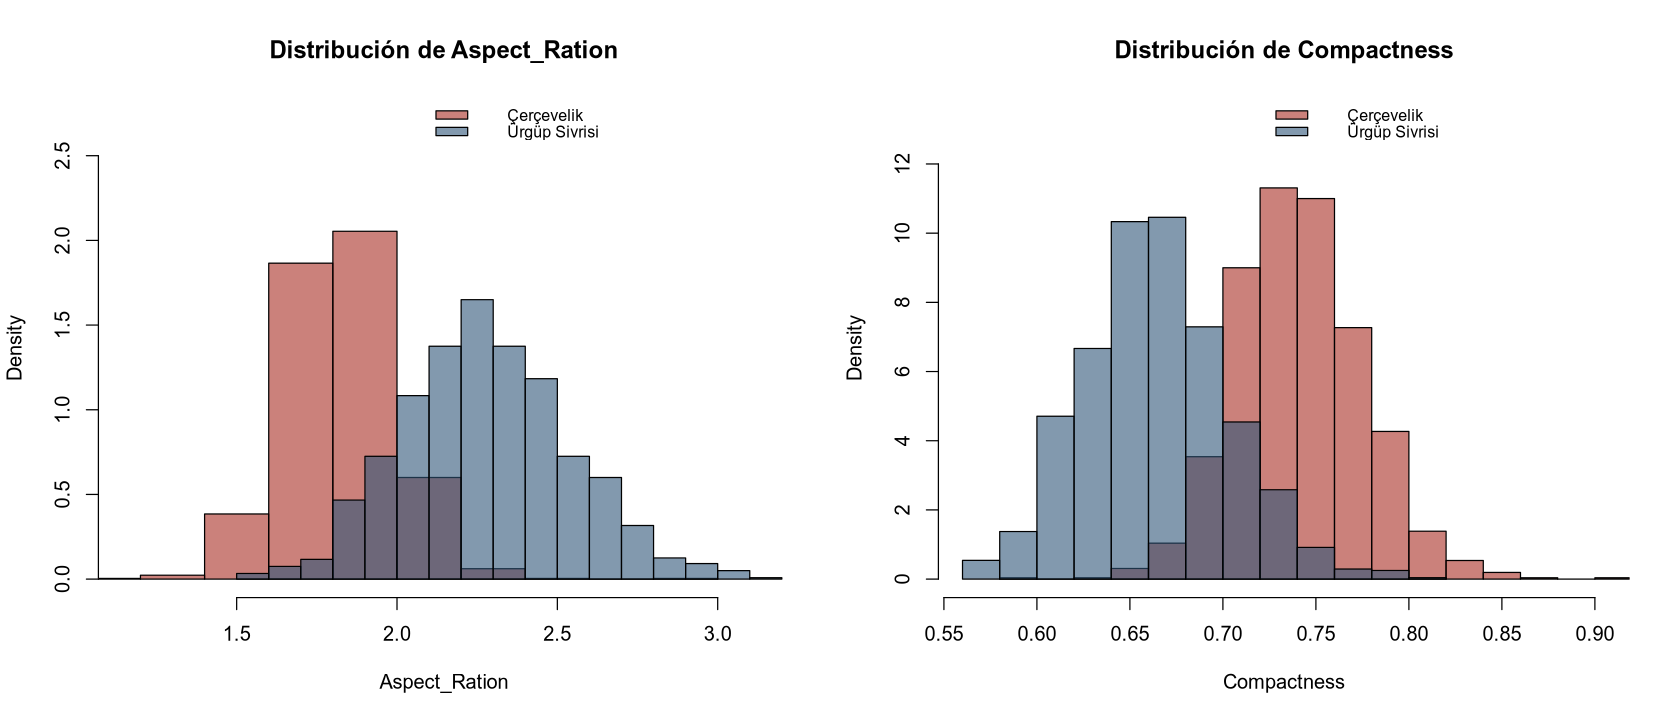

In [8]:
options(repr.plot.width = 14, repr.plot.height = 6)

class_1 <- "Çerçevelik"
class_2 <- "Ürgüp Sivrisi"

vars_numericas <- colnames(df_seeds)[sapply(df_seeds, is.numeric)]

par(mfrow = c(1, 2))

for (var in vars_numericas) {
  data_c1 <- df_seeds[df_seeds$Class == class_1, var]
  data_c2 <- df_seeds[df_seeds$Class == class_2, var]

  rango_x <- range(c(data_c1, data_c2))

  hist(data_c1,
    col = rgb(0.66, 0.18, 0.14, 0.6),
    main = paste("Distribución de", var),
    xlab = var,
    freq = FALSE,
    xlim = rango_x,
    ylim = c(0, max(density(data_c1)$y, density(data_c2)$y) * 1.1)
  )

  hist(data_c2,
    col = rgb(0.187, 0.339, 0.474, 0.6),
    add = TRUE,
    freq = FALSE
  )

  legend("topright",
    legend = c(class_1, class_2),
    fill = c(rgb(0.66, 0.18, 0.14, 0.6), rgb(0.187, 0.339, 0.474, 0.6)),
    box.lty = "blank",
    cex = 0.8
  )
}

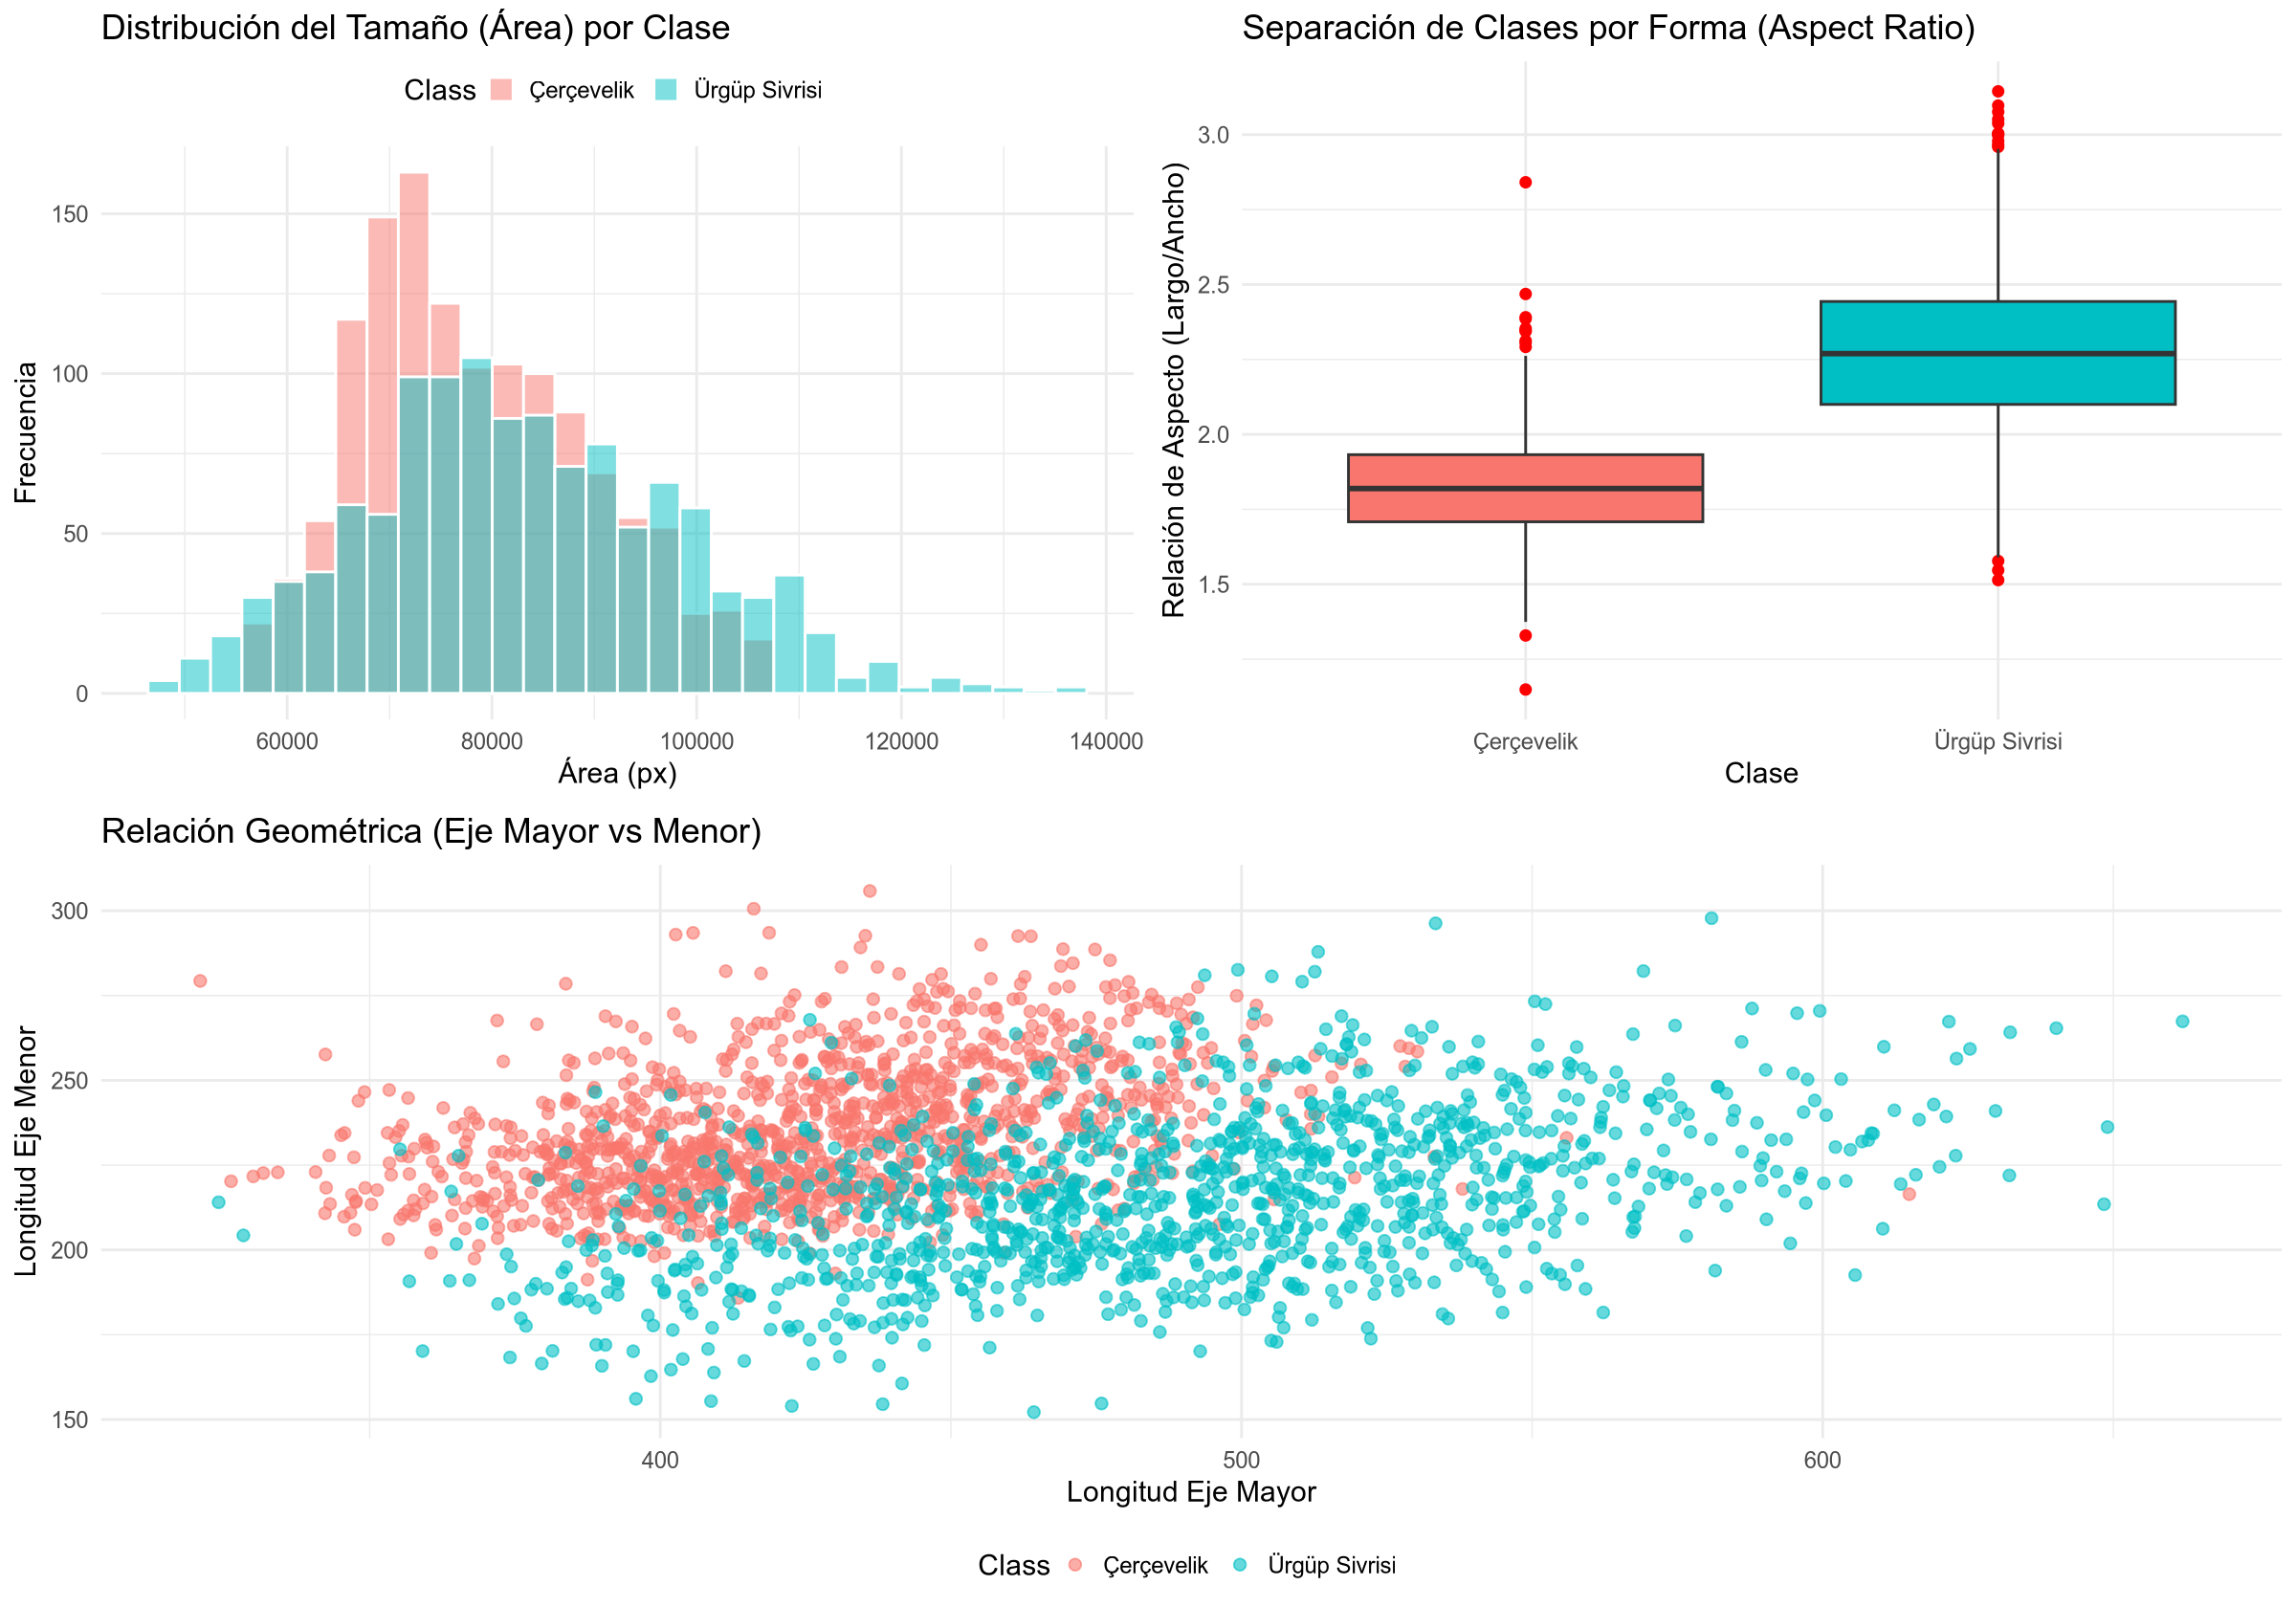

In [9]:
options(repr.plot.width = 20, repr.plot.height = 14)

g1 <- ggplot(df_seeds, aes(x = Area, fill = Class)) +
  geom_histogram(
    bins = 30,
    color = "white",
    alpha = 0.5,
    position = "identity"
  ) +
  labs(
    title = "Distribución del Tamaño (Área) por Clase",
    x = "Área (px)", y = "Frecuencia"
  ) +
  theme_minimal(base_size = 18) +
  theme(legend.position = "top")

g2 <- ggplot(df_seeds, aes(x = Class, y = Aspect_Ration, fill = Class)) +
  geom_boxplot(outlier.colour = "red", outlier.size = 3) +
  labs(
    title = "Separación de Clases por Forma (Aspect Ratio)",
    x = "Clase", y = "Relación de Aspecto (Largo/Ancho)"
  ) +
  theme_minimal(base_size = 18) +
  theme(legend.position = "none")

g3 <- ggplot(df_seeds, aes(
  x = Major_Axis_Length,
  y = Minor_Axis_Length, color = Class
)) +
  geom_point(alpha = 0.6, size = 3) +
  labs(
    title = "Relación Geométrica (Eje Mayor vs Menor)",
    x = "Longitud Eje Mayor", y = "Longitud Eje Menor"
  ) +
  theme_minimal(base_size = 18) +
  theme(legend.position = "bottom")

grid.arrange(g1, g2, g3, layout_matrix = rbind(c(1, 2), c(3, 3)))

### Principales observaciones:

#### 1. Observaciones del Dataset

El análisis estadístico descriptivo revela un dataset de alta calidad técnica con 2500 instancias y sin valores nulos:
1. Las variables presentan escalas muy dispares. Mientras que `Area` tiene una media de ~80k, features de forma como `Solidity` o `Compactness` oscilan entre 0 y 1. Esto indica la necesidad imperativa de aplicar escalado o normalización (StandardScaler/MinMaxScaler) antes de usar algoritmos basados en distancia (como KNN o SVM).
2. La media (80658) y la mediana (79076) de la variable `Area` son cercanas, sugiriendo una distribución bastante simétrica sin un sesgo excesivo. Sin embargo, la `Eccentricity` media alta (0.86) indica que, en general, las semillas tienden a ser alargadas en lugar de esféricas.
3. Variables como `Solidity` tienen una desviación estándar muy baja (rango intercuartílico de apenas 0.003), lo que sugiere que la mayoría de semillas son muy lisas; los valores bajos aquí serán probables outliers o semillas deformes.
4. La variable objetivo (`Class`) está perfectamente balanceada (52% *Çerçevelik* vs 48% *Ürgüp Sivrisi*), permitiendo usar la *Accuracy* como métrica fiable.


#### 2. Glosario de Variables

* **Convex_Area:** Área total envolviendo la semilla.
* **Solidity:** Es la división entre `Area / Convex_Area`.
    * Si es 1, la semilla es perfectamente sólida y convexa (sin bordes irregulares o huecos). Si es baja, la semilla tiene bordes muy irregulares. En los datos es casi 1 (0.989), por lo que las semillas son muy lisas.
* **Equiv_Diameter:** Es el diámetro que tendría un círculo perfecto que tuviera la misma área que la semilla.
* **Eccentricity (Excentricidad):** Mide cuánto se desvía la forma de ser un círculo.
    * *0 = Círculo perfecto.*
    * *1 = Línea recta.*
    * *Nuestra Media (0.86):* Son semillas bastante alargadas (como elipses).
* **Extent:** Relación entre el área de la semilla y el área del "Bounding Box" (el rectángulo más pequeño posible en el que cabe la semilla).
* **Aspect_Ration:** Es la división entre `Major_Axis_Length` (Largo) y `Minor_Axis_Length` (Ancho). Indica cuán alargada es la semilla.
* **Compactness:** Mide qué tan compacta o redonda es la forma. Una forma compleja e irregular es menos compacta.

>* **Çerçevelik / Ürgüp Sivrisi:** Son los nombres de las dos variedades de calabaza cultivadas en Turquía.

#### 3. Justificación de la Selección de Gráficos

* **Histograma de `Area` agrupado por Clase:** Lo hemos seleccionado para analizar no solo la distribución normal de la variable, sino específicamente el grado de solapamiento entre las dos poblaciones. Al superponer ambas distribuciones, podemos validar visualmente la hipótesis de que el tamaño no es un buen predictor por sí solo, justificando la necesidad de buscar variables de forma más complejas.
* **Boxplot de `Aspect_Ration`:** Tras el análisis de varianza, se detectó que el Área tenía un bajo poder discriminante. Se eligió graficar la `Aspect_Ration` (Relación de Aspecto) por ser la variable con mayor separación entre medias. El Boxplot es la herramienta idónea para visualizar esta separación nítida de rangos intercuartílicos y confirmar la ausencia de solapamiento significativo.
* **Scatterplot (`Major_Axis` vs `Minor_Axis`):** Al tratarse de un problema geométrico, es crucial visualizar la interacción entre las dimensiones espaciales. Este gráfico permite evaluar la separabilidad lineal de las clases en un espacio bidimensional, descomponiendo la forma en sus dos componentes ortogonales básicos y mostrando la frontera de decisión.

#### 4. Análisis de Observaciones

* **Solapamiento Crítico en Tamaño:** El histograma desglosado confirma visualmente que el `Area` no es una variable discriminante eficaz. Se observa una amplia zona de intersección donde las curvas de densidad de ambas clases se superponen casi totalmente. Esto ratifica que el tamaño de las semillas es muy similar entre variedades y confundiría a un clasificador simple.
* **Diferenciación Morfológica:** En contraste, el Boxplot de `Aspect_Ration` revela el patrón discriminante real: las clases son morfológicamente distintas. La variedad *Ürgüp Sivrisi* presenta valores altos (forma alargada), mientras que la *Çerçevelik* tiene valores bajos (forma redondeada). La separación de las cajas es casi total, garantizando una alta precisión de clasificación.
* **Separabilidad Lineal:** El Scatterplot corrobora que las clases son linealmente separables si consideramos la proporción. Se observa claramente que a medida que crece el *Eje Mayor*, la clase *Çerçevelik* compensa creciendo en el *Eje Menor* (manteniendo la esfericidad), mientras que la *Ürgüp Sivrisi* no, divergiendo en el gráfico. La frontera entre ambos grupos es nítida y fácil de trazar.

## <font color='#3d59c6'>  3. SELECCIÓN DE VARIABLES </font>

Se realizará un análisis de Información Mutua para cuantificar la dependencia estadística y observar qué variables aportan mayor ganancia de información respecto a la variable target (Class). Seguidamente, se hará un Estudio de Correlación para detectar la fuerte multicolinealidad esperada entre las dimensiones geométricas (redundancia de datos). A continuación, se aplicará un Análisis de Componentes Principales (PCA) con la intención de reducir la dimensionalidad de las variables en nuevas componentes latentes que sean independientes entre ellas y permitan visualizar la separabilidad de las clases en un espacio reducido. Finalmente, habiendo caracterizado las variables más adecuadas mediante todos los procedimientos mencionados, se establecerá la base para un modelo de clasificación robusto. El objetivo de este análisis es maximizar la capacidad de distinguir correctamente entre las variedades Çerçevelik y Ürgüp Sivrisi basándonos en sus propiedades morfométricas.

In [10]:
df_num <- df_seeds[, sapply(df_seeds, is.numeric)]
target <- df_seeds$Class

### <font color='#3d59c6'>  3.1 REALIZACIÓN IGA </font>

Con el objetivo de cuantificar la dependencia estadística entre la variable objetivo (*Class*) y las covariables geométricas, se aplican tres algoritmos de **Ganancia de Información (IGA)**. Estos métodos miden la reducción de incertidumbre (Entropía) de la clase al conocer el valor de cada atributo. Se comparan tres métricas distintas para asegurar la robustez de la selección, ya que cada una corrige diferentes sesgos:
* **Information Gain ("infogain"):** Mide la ganancia pura de información. Tiende a favorecer variables con muchos valores únicos.
$$H(Class) + H(Attribute) - H(Class, Attribute)$$

* **Gain Ratio ("gainratio"):** Normaliza la ganancia de información dividiéndola por la entropía del atributo, penalizando así las variables con excesiva fragmentación (muchos valores únicos).
 $$\frac{H(Class) + H(Attribute) - H(Class, Attribute)}{H(Attribute)}$$
 
* **Symmetrical Uncertainty ("symuncert"):** Una medida normalizada que varía entre 0 y 1, calculada como un promedio armónico, lo que permite comparar variables con diferentes números de valores de manera justa.
 $$2 \times \frac{H(Class) + H(Attribute) - H(Class, Attribute)}{H(Attribute) + H(Class)}$$

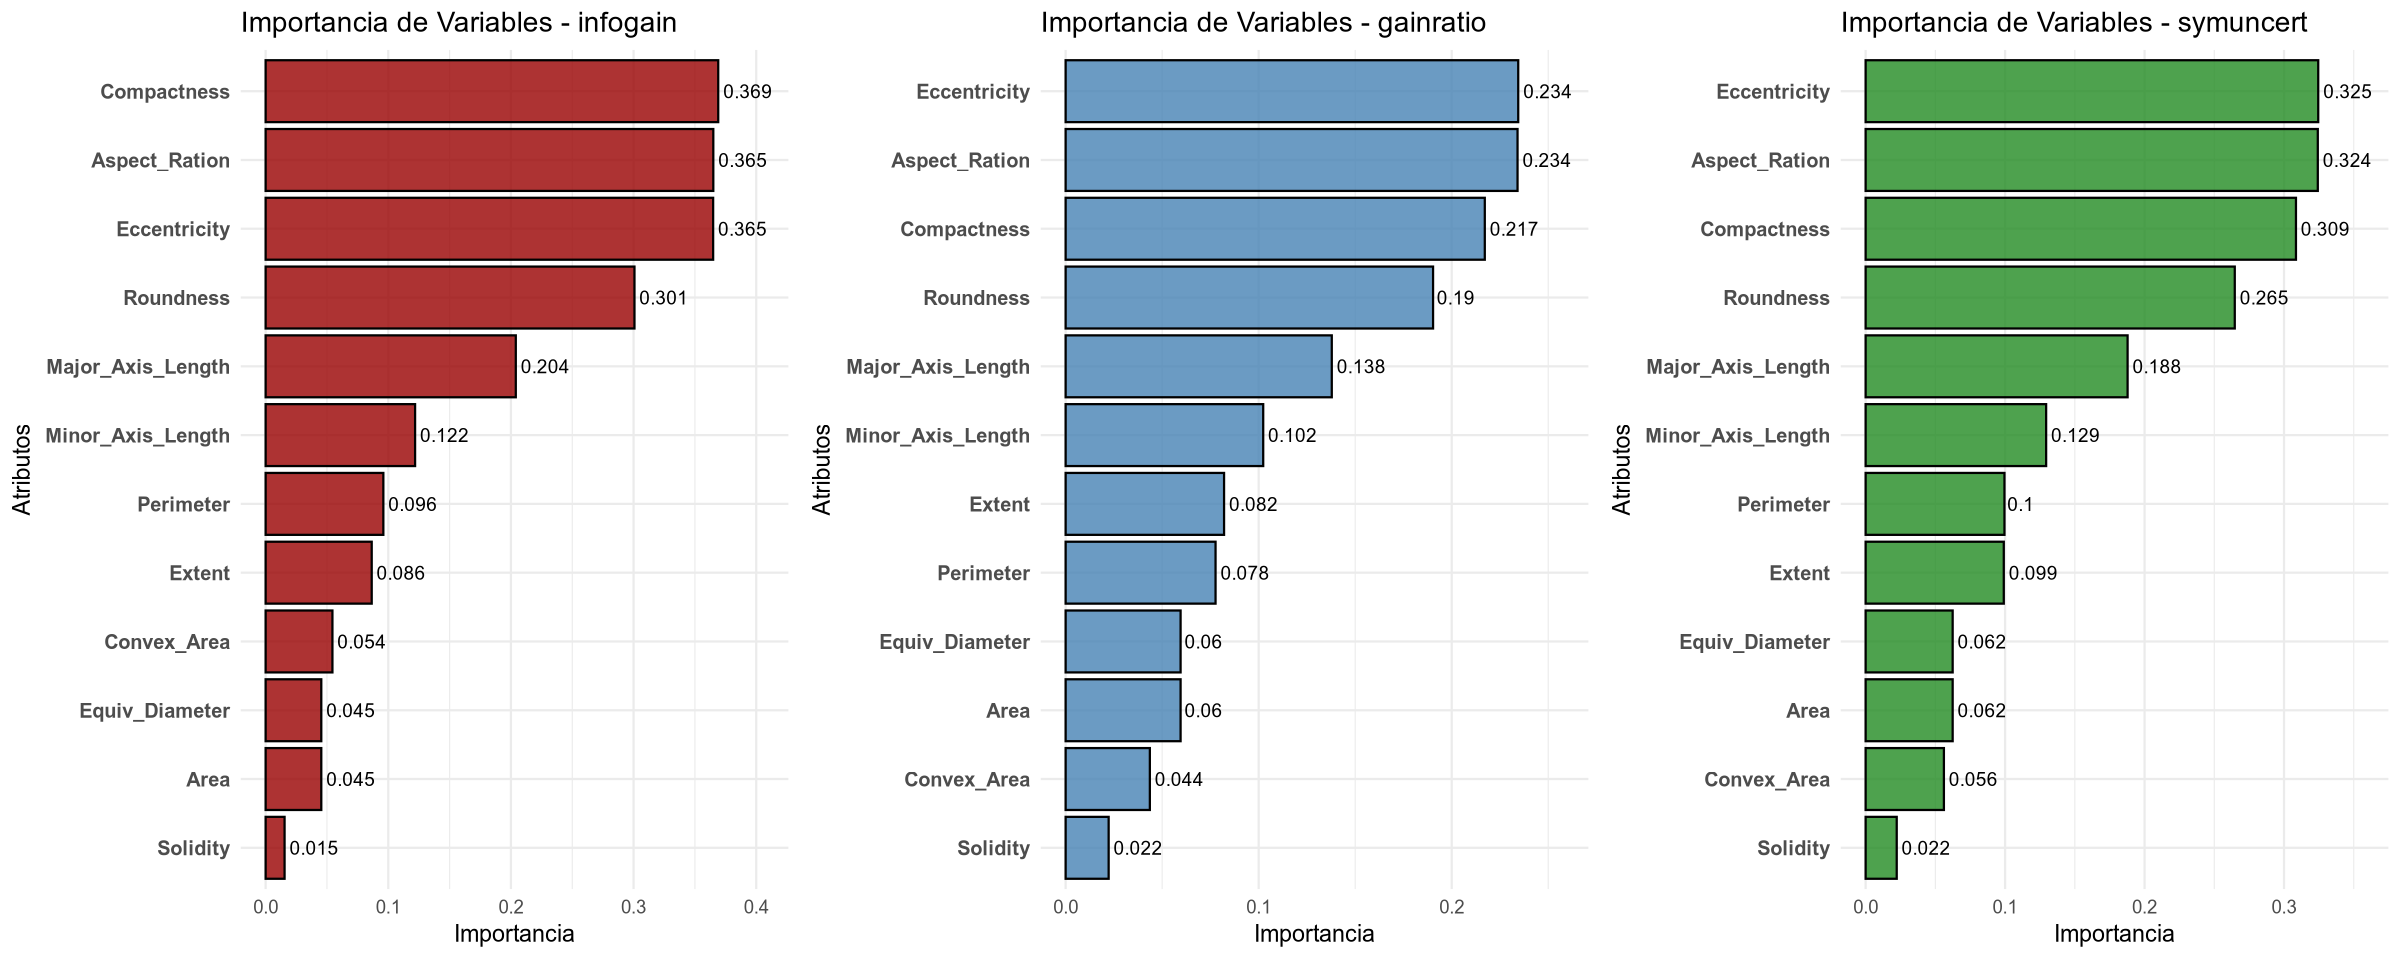

In [11]:
options(repr.plot.width = 20, repr.plot.height = 8)

plot_iga <- function(data, metric_name, bar_color) {
  weights <- information_gain(
    formula = Class ~ .,
    data = df_seeds,
    type = metric_name
  )

  p <- ggplot(weights, aes(x = reorder(
    attributes,
    importance
  ), y = importance)) +
    geom_bar(
      stat = "identity", fill = bar_color,
      color = "black", alpha = 0.8
    ) +
    geom_text(aes(label = round(importance, 3)),
      hjust = -0.1, color = "black", size = 4
    ) +
    coord_flip() +
    labs(
      title = paste("Importancia de Variables -", metric_name),
      x = "Atributos", y = "Importancia"
    ) +
    theme_minimal(base_size = 14) +
    theme(axis.text.y = element_text(size = 12, face = "bold")) +
    ylim(0, max(weights$importance) * 1.1)

  return(p)
}

p1 <- plot_iga(df_seeds, "infogain", "#990000")

p2 <- plot_iga(df_seeds, "gainratio", "#4682B4")

p3 <- plot_iga(df_seeds, "symuncert", "#228B22")

grid.arrange(p1, p2, p3, ncol = 3)

### Interpretación de los Resultados IGA

**1. Supremacía de las Variables de Forma (Morfología):**

Existe un patrón indiscutible: el "Top 3" de variables predictivas está formado invariablemente por **`Compactness`**, **`Aspect_Ration`** y **`Eccentricity`**.
   * En **Information Gain**, `Compactness` lidera el ranking (0.369), seguida muy de cerca por `Aspect_Ration` (0.365).
   * Sin embargo, al observar **Gain Ratio** (que penaliza variables con excesiva fragmentación de valores), **`Eccentricity`** asciende al primer puesto (0.234). Esto sugiere que, aunque la Compacidad aporta mucha información bruta, la Excentricidad es un predictor estructuralmente más eficiente y robusto para generalizar.
     
**2. Bajo Poder Discriminante de las Variables Dimensionales:**

Tal y como anticipamos en el análisis visual (EDA), las variables relacionadas con el tamaño absoluto (`Area`, `Perimeter`, `Convex_Area`, `Equiv_Diameter`) aparecen sistemáticamente en el tercio inferior de la tabla.
   * El **`Area`**, con una importancia de apenas **0.059** en Gain Ratio, aporta casi 4 veces menos información que la `Eccentricity`. Esto confirma que el tamaño de las semillas tiene un alto solapamiento entre clases y es un predictor débil por sí mismo.
     
**3. Irrelevancia de la Solidez:**

La variable **`Solidity`** ocupa la última posición en todas las métricas (valores cercanos a 0.015 - 0.022). Esto indica que la rugosidad o irregularidad de los bordes es prácticamente idéntica en ambas variedades de calabaza, convirtiéndola en ruido para el modelo.

>**Conclusión para la Selección:**
La consistencia entre los tres algoritmos valida la decisión de priorizar características geométricas adimensionales. El modelo se beneficiará enormemente de **`Eccentricity`** y **`Aspect_Ration`**, mientras que las variables de tamaño son candidatas claras a ser reducidas mediante PCA para evitar redundancia sin perder la poca información que aportan.

### <font color='#3d59c6'>  3.2 ANÁLISIS CORRELACIONES </font>

En este apartado se visualiza la matriz de correlación de Pearson para cuantificar la relación lineal entre las variables predictoras. El objetivo principal es detectar la multicolinealidad (redundancia).

Dado que estamos trabajando con medidas geométricas (como Área, Perímetro y Diámetro Equivalente), esperamos encontrar correlaciones positivas muy fuertes (cercanas a +1). Identificar estos grupos es crucial porque indican que varias variables aportan prácticamente la misma información. Esto justificará matemáticamente la necesidad de aplicar técnicas de reducción de dimensionalidad (PCA) en el siguiente paso, ya que el modelo no necesita tantas variables repetidas.

In [12]:
df_num <- df_seeds[, sapply(df_seeds, is.numeric)]

cor_matrix <- round(cor(df_num), 2)

print(cor_matrix)

                   Area Perimeter Major_Axis_Length Minor_Axis_Length
Area               1.00      0.93              0.79              0.69
Perimeter          0.93      1.00              0.95              0.39
Major_Axis_Length  0.79      0.95              1.00              0.10
Minor_Axis_Length  0.69      0.39              0.10              1.00
Convex_Area        1.00      0.93              0.79              0.69
Equiv_Diameter     1.00      0.93              0.79              0.69
Eccentricity       0.16      0.46              0.70             -0.59
Solidity           0.16      0.07              0.12              0.09
Extent            -0.01     -0.14             -0.21              0.23
Roundness         -0.15     -0.50             -0.68              0.56
Aspect_Ration      0.16      0.49              0.73             -0.60
Compactness       -0.16     -0.48             -0.73              0.60
                  Convex_Area Equiv_Diameter Eccentricity Solidity Extent
Area            

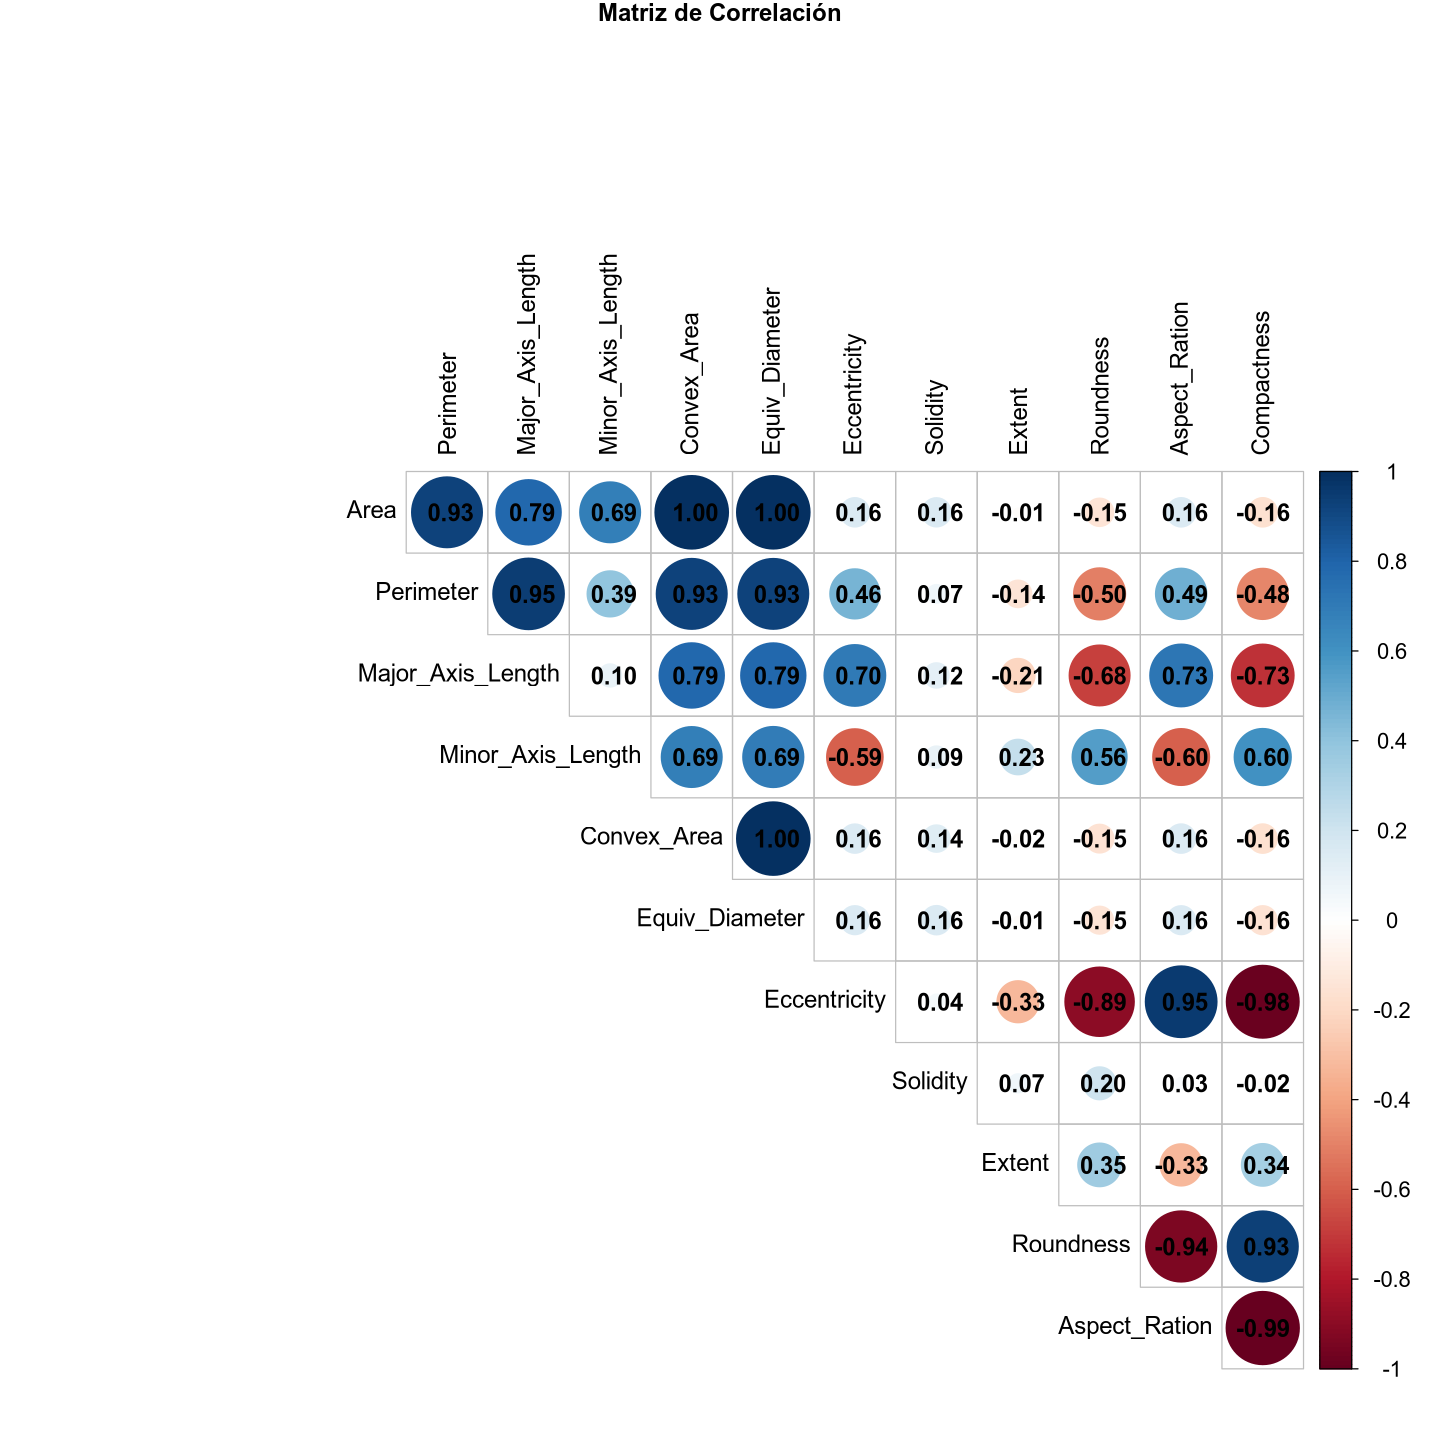

In [13]:
options(repr.plot.width = 12, repr.plot.height = 12)

par(oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0))

corrplot::corrplot(cor(df_num),
  method = "circle",
  type = "upper",
  addCoef.col = "black",
  number.cex = 1.2,
  tl.cex = 1.2,
  tl.col = "black",
  tl.srt = 90,
  diag = FALSE,
  cl.cex = 1.1,
  cl.ratio = 0.15,
  title = "Matriz de Correlación",
  mar = c(0, 0, 1, 0)
)

### Interpretación de la Matriz de Correlaciones

El análisis cuantitativo de la matriz de Pearson revela patrones de **multicolinealidad severa** que confirman la necesidad de reducir la dimensionalidad del dataset antes del modelado. Se observan tres fenómenos estadísticos principales:

**1. Redundancia Absoluta en Variables de Tamaño:**
Como era previsible en datos geométricos, las variables que miden la magnitud de la semilla presentan correlaciones perfectas o casi perfectas.
   * **`Area` vs. `Convex_Area` vs. `Equiv_Diameter`:** El coeficiente es **1.00**. Esto implica que estas tres variables aportan exactamente la misma información matemática al modelo. Incluirlas simultáneamente en una Regresión Logística generaría inestabilidad en los coeficientes sin mejorar la predicción.
   * **`Area` vs. `Perimeter`:** Muestran una correlación muy fuerte de **0.93**, lo cual es lógico ya que a mayor superficie, mayor contorno.

**2. Fuerte Vinculación Inversa en Variables de Forma:**
Existe un segundo clúster de multicolinealidad entre los descriptores de forma, evidenciado por correlaciones negativas extremas.
   * **`Compactness` vs. `Aspect_Ration`:** Coeficiente de **-0.99**. Existe una relación lineal inversa casi perfecta: cuanto más compacta (redonda) es una semilla, menor es su relación de aspecto (menos alargada).
   * **`Compactness` vs. `Eccentricity`:** Coeficiente de **-0.98**. Ambas variables miden la desviación respecto a un círculo perfecto, por lo que son matemáticamente redundantes.

**3. Independencia de la Solidez y Extensión:**
Cabe destacar que la variable **`Solidity`** presenta correlaciones muy bajas con el resto de características (máximo de 0.20 con *Roundness* y tan bajo como 0.07 con *Perimeter*). Esto sugiere que la regularidad del borde es una característica independiente del tamaño o la elongación de la semilla.

>**Conclusión para el Modelado:**
La presencia de múltiples coeficientes cercanos a **1.00** o **-1.00** justifica plenamente la aplicación del **Análisis de Componentes Principales (PCA)**. El objetivo será condensar estos dos grandes grupos de información redundante ("Tamaño" y "Forma") en nuevas variables latentes (PC1 y PC2) que sean ortogonales (independientes) entre sí, eliminando el ruido y facilitando la convergencia del algoritmo de clasificación.

### <font color='#3d59c6'>  3.3 ANÁLISIS PCA </font>

Tras detectar una severa multicolinealidad en el análisis previo (especialmente entre las variables de tamaño) y observar una gran disparidad de magnitudes entre los atributos (ej. *Area*  80,000 vs. *Solidity*  0.9), se ha optado por aplicar un Análisis de Componentes Principales (PCA) en lugar de eliminar variables manualmente.

Esta técnica nos permite abordar ambos problemas simultáneamente mediante una transformación matemática del espacio de datos:

1. **Gestión de la Redundancia:** El PCA transformará las 12 variables correlacionadas en un conjunto menor de nuevas variables que son totalmente independientes entre sí y que están ordenadas de forma que las primeras capturen la **máxima varianza** posible del dataset.
2. **Estandarización Implícita:** Para evitar que las variables con valores numéricos altos (como el Área) dominen artificialmente la varianza, el PCA se ejecutará sobre la **matriz de correlación** (y no la de covarianza). Esto equivale a estandarizar los datos (media 0, desviación 1), asegurando que todas las variables, independientemente de su unidad de medida, contribuyan equitativamente a la formación de las componentes.

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4      Comp.5
Standard deviation     2.4307445 2.0195727 1.01982672 0.91591423 0.292751879
Proportion of Variance 0.4923766 0.3398895 0.08667054 0.06990824 0.007141972
Cumulative Proportion  0.4923766 0.8322661 0.91893660 0.98884484 0.995986813
                            Comp.6       Comp.7      Comp.8       Comp.9
Standard deviation     0.194311691 0.0753152803 0.058499025 3.220710e-02
Proportion of Variance 0.003146419 0.0004726993 0.000285178 8.644146e-05
Cumulative Proportion  0.999133233 0.9996059319 0.999891110 9.999776e-01
                            Comp.10      Comp.11      Comp.12
Standard deviation     1.311665e-02 9.639334e-03 2.102475e-03
Proportion of Variance 1.433721e-05 7.743063e-06 3.683666e-07
Cumulative Proportion  9.999919e-01 9.999996e-01 1.000000e+00

[1] "Peso de las variables en cada Componente (Loadings)"
                  Comp.1 Comp.2 Comp.3 Comp.4 Comp.5
Area               0.305  0.332  0.019  0.011  0.086
Perimeter          0.380  0.181  0.074 -0.034 -0.219
Major_Axis_Length  0.409  0.040 -0.033 -0.040  0.005
Minor_Axis_Length  0.011  0.491  0.095  0.055 -0.046
Convex_Area        0.305  0.331  0.038  0.006  0.090
Equiv_Diameter     0.304  0.333  0.018  0.010  0.084
Eccentricity       0.312 -0.299 -0.107 -0.060  0.646
Solidity           0.035  0.083 -0.928  0.277 -0.196
Extent            -0.116  0.155 -0.268 -0.944 -0.014
Roundness         -0.307  0.297 -0.156  0.113  0.650
Aspect_Ration      0.318 -0.303 -0.083 -0.073 -0.149
Compactness       -0.320  0.306  0.080  0.070 -0.166


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


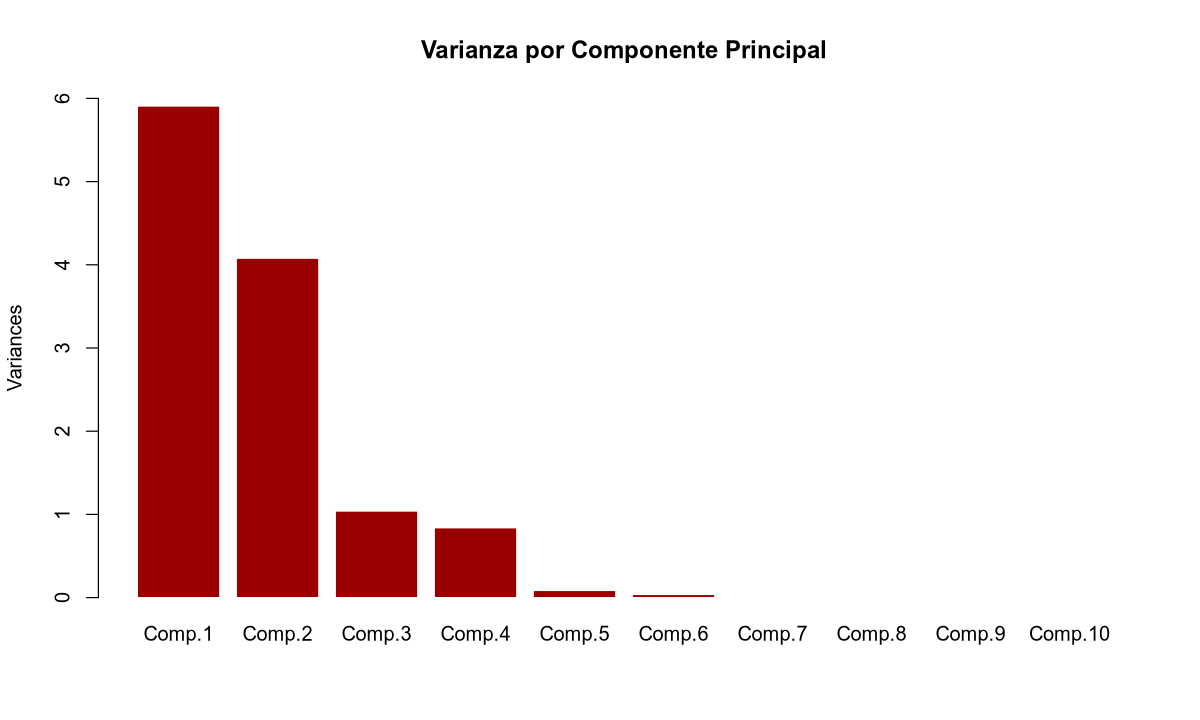

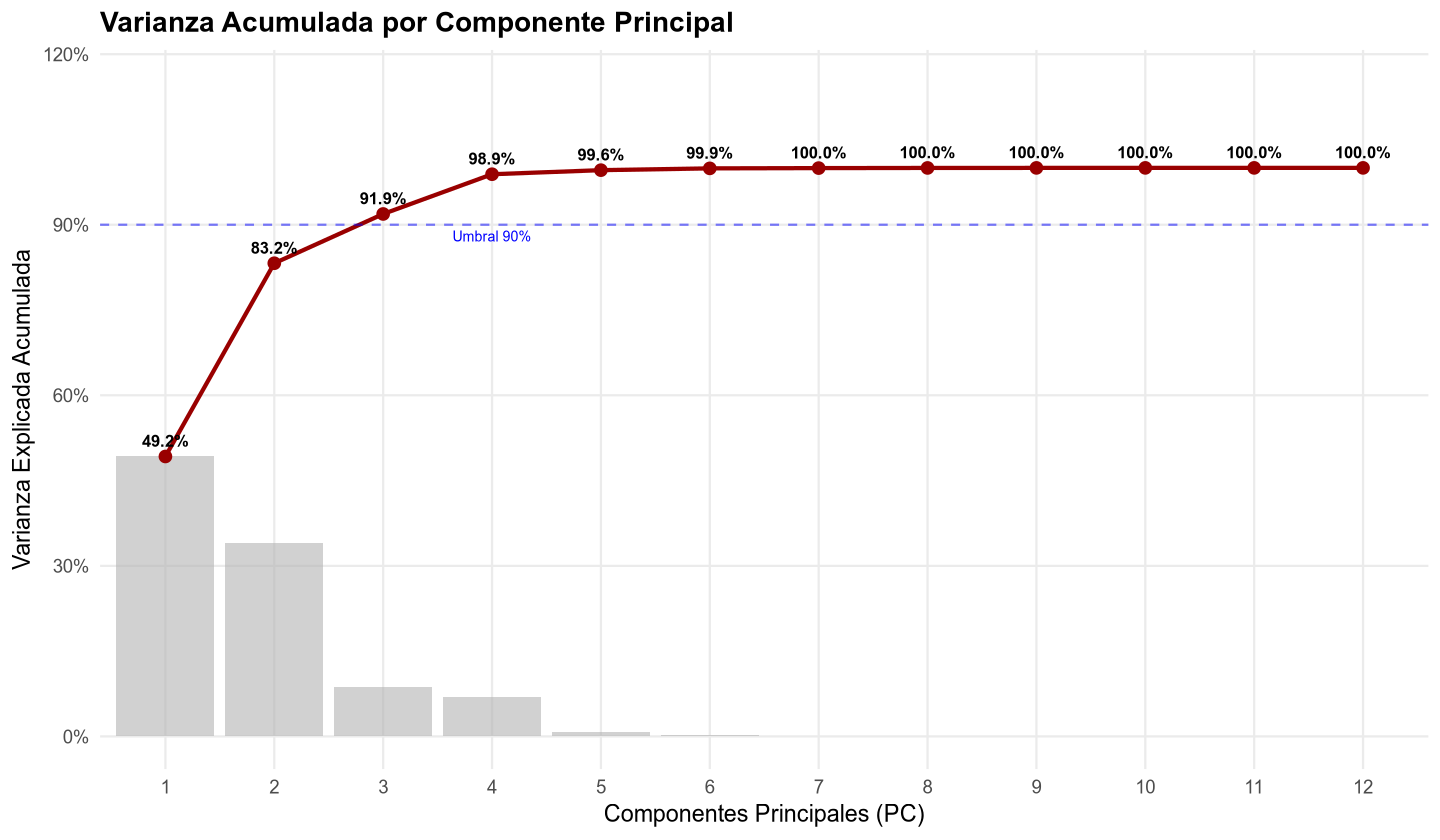

In [14]:
df_seeds_num_nt <- df_seeds[, sapply(df_seeds, is.numeric)]

PCA <- princomp(df_seeds_num_nt, cor = TRUE, scores = TRUE)

summary(PCA)

options(repr.plot.width = 10, repr.plot.height = 6)
plot(PCA,
  type = "bar",
  main = "Varianza por Componente Principal",
  col = "#990000",
  border = FALSE,
  ylim = c(0, 6)
)

print("Peso de las variables en cada Componente (Loadings)")
print(round(PCA$loadings[, 1:5], 3))
options(repr.plot.width = 12, repr.plot.height = 7)

var_explained <- PCA$sdev^2
prop_var <- var_explained / sum(var_explained)
cum_var <- cumsum(prop_var)

df_scree <- data.frame(
  Component = factor(1:length(prop_var), levels = 1:length(prop_var)),
  Proportion = prop_var,
  Cumulative = cum_var
)

ggplot(df_scree, aes(x = Component)) +
  geom_bar(aes(y = Proportion),
    stat =
      "identity", fill = "gray70", alpha = 0.6
  ) +
  geom_line(aes(y = Cumulative, group = 1), color = "#990000", size = 1.2) +
  geom_point(aes(y = Cumulative), color = "#990000", size = 3) +
  geom_text(
    aes(
      y = Cumulative, label =
        scales::percent(Cumulative, accuracy = 0.1)
    ),
    vjust = -0.8, color = "black", size = 3.5, fontface = "bold"
  ) +
  geom_hline(
    yintercept = 0.90,
    linetype = "dashed", color = "blue", alpha = 0.5
  ) +
  annotate("text",
    x = 4,
    y = 0.88, label = "Umbral 90%", color = "blue", size = 3
  ) +
  scale_y_continuous(
    labels = scales::percent, limits = c(0, 1.15),
    name = "Varianza Explicada Acumulada"
  ) +
  labs(
    title = "Varianza Acumulada por Componente Principal",
    x = "Componentes Principales (PC)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.minor = element_blank(), plot.title =
      element_text(face = "bold")
  )

### Interpretación de los Resultados PCA

El análisis revela una estructura latente altamente redundante que valida la reducción de dimensionalidad:

1. **Eficiencia del Modelo:** Las dos primeras componentes (**PC1 y PC2**) capturan por sí solas el **83.22%** de la varianza total (llegando al **92%** con la tercera). Esto permite simplificar el dataset de 12 variables a un espacio bidimensional sin pérdida significativa de información.
2. **Significado Físico de las Componentes:**
    * **PC1 (Dimensión de Forma):** Definida por la oposición entre *Major_Axis_Length* (positiva) y *Compactness* (negativa). Actúa como el discriminante principal, separando las semillas alargadas de las redondas.
    * **PC2 (Dimensión de Tamaño):** Dominada por *Minor_Axis_Length* y *Area*. Captura la magnitud física (volumen) de la semilla independientemente de su forma.

> Hemos transformado variables correlacionadas en ejes ortogonales (independientes). En este nuevo espacio, la **PC1** es la responsable de separar las clases (*Çerçevelik* vs *Ürgüp Sivrisi*), mientras que la **PC2** absorbe la variabilidad de tamaño natural dentro de cada clase, limpiando el ruido para el clasificador.

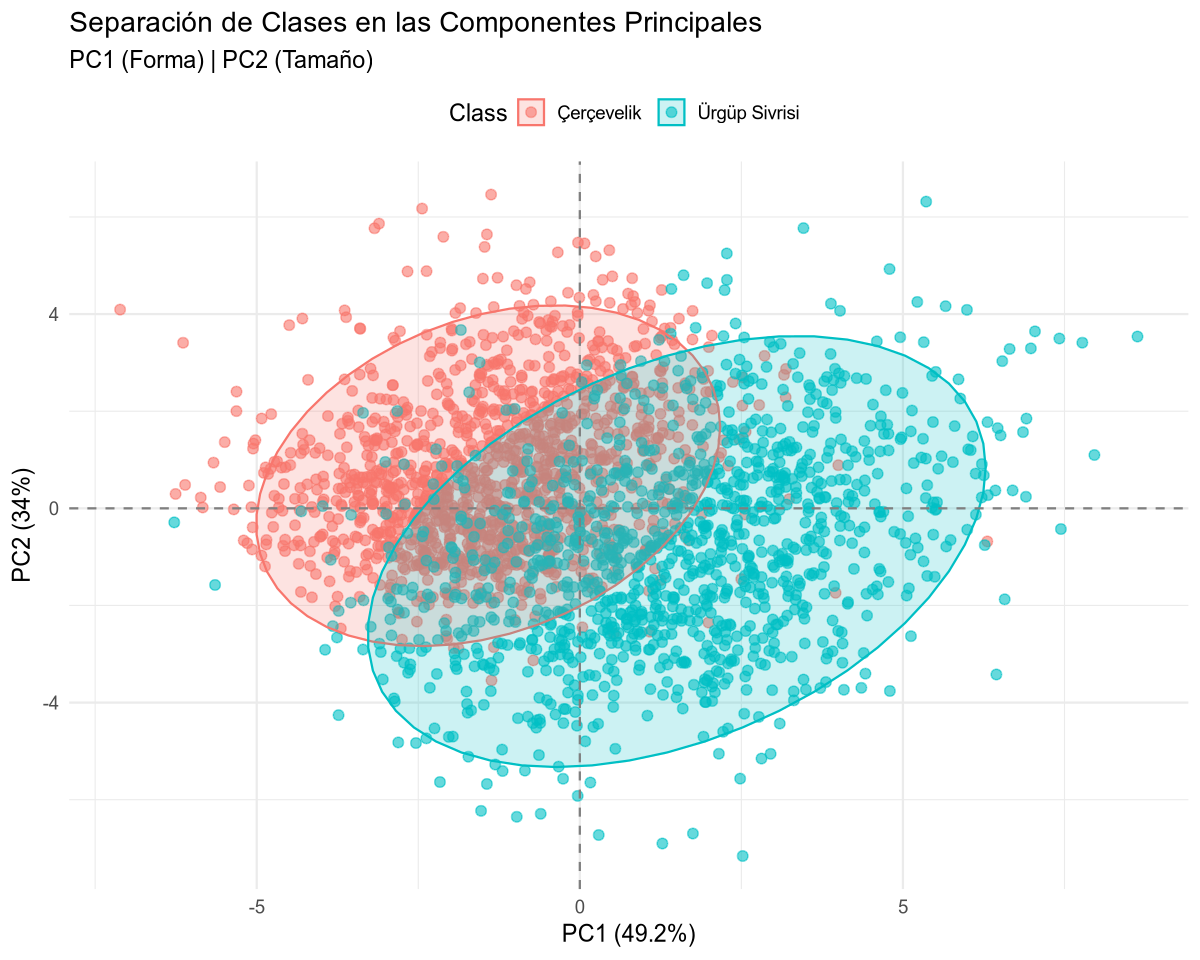

In [15]:
pca_data <- data.frame(
  PC1 = PCA$scores[, 1],
  PC2 = PCA$scores[, 2],
  Class = df_seeds$Class
)

options(repr.plot.width = 10, repr.plot.height = 8)

ggplot(pca_data, aes(x = PC1, y = PC2, color = Class, fill = Class)) +
  geom_point(alpha = 0.6, size = 2.5) +
  stat_ellipse(geom = "polygon", alpha = 0.2, level = 0.95) +
  geom_hline(yintercept = 0, linetype = "dashed", color = "gray50") +
  geom_vline(xintercept = 0, linetype = "dashed", color = "gray50") +
  labs(
    title = "Separación de Clases en las Componentes Principales",
    subtitle = "PC1 (Forma) | PC2 (Tamaño)",
    x = paste0("PC1 (", round(prop_var[1] * 100, 1), "%)"),
    y = paste0("PC2 (", round(prop_var[2] * 100, 1), "%)")
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "top")

### Visualización del Espacio Latente (PC1 vs PC2)

La proyección de las muestras en las dos primeras componentes principales (que acumulan el **83.2%** de la varianza) revela la estructura real del problema de clasificación:

**1. Orientación Diagonal de las Clases:**
A diferencia de una separación ortogonal simple, las variedades se distribuyen diagonalmente en el plano:

* **Clase *Çerçevelik* (Naranja):** Se concentra en el cuadrante **superior izquierdo** (valores bajos en PC1, altos en PC2). Su elipse es más compacta, lo que sugiere una menor variabilidad morfológica en esta variedad.
* **Clase *Ürgüp Sivrisi* (Azul):** Se extiende hacia el cuadrante **inferior derecho** (valores altos en PC1, bajos en PC2) y presenta una elipse más grande, indicando una mayor dispersión o heterogeneidad en las formas de estas semillas.

**2. Análisis Crítico del Solapamiento:**
El hallazgo más relevante es la existencia de una amplia **zona de confusión** en el centro del gráfico.

* Se estima visualmente que cerca del **50% del área de confianza de la clase *Çerçevelik*** (Naranja) se solapa con un **30% de la clase *Ürgüp Sivrisi*** (Azul).
* Esto implica que la mitad de las semillas *Çerçevelik* son morfológicamente indistinguibles de una parte significativa de las *Ürgüp Sivrisi* si solo miramos estas dimensiones lineales. No son dos especies "ajenas", sino dos variedades con un fenotipo compartido considerable.

>**Implicaciones para el Modelado:**
Este solapamiento estructural descarta la posibilidad de obtener un 100% de precisión con un modelo lineal simple. Cualquier frontera de decisión recta (como la de una Regresión Logística básica) tendrá que "sacrificar" aciertos en esa zona central naranja-azul. Esto justifica la necesidad futura de probar métricas que penalicen falsos positivos o considerar modelos no lineales si se requiere mayor precisión en esa zona.

### <font color='#3d59c6'>  3.4 ANÁLISIS ANOVA </font>

Una vez explorada la estructura latente del dataset mediante PCA y visualizada la zona de solapamiento entre las clases, es necesario cuantificar estadísticamente la capacidad discriminante de cada variable original por separado. Para ello, aplicaremos un **Análisis de Varianza (ANOVA) de un factor**.

A diferencia del algoritmo *Information Gain* (basado en entropía) o el PCA (basado en varianza conjunta), el ANOVA es una prueba de hipótesis paramétrica que compara las medias de las dos poblaciones (*Çerçevelik* vs. *Ürgüp Sivrisi*).

El indicador clave será el **Valor F (F-Value)**, que representa la razón entre la varianza *entre grupos* (lo diferentes que son las clases) y la varianza *dentro del grupo* (lo dispersas que son las semillas de una misma clase).

* **Valor F Alto:** Indica que la variable separa las clases con gran nitidez (medias muy distantes, poca dispersión).
* **Valor F Bajo:** Sugiere que hay mucho solapamiento y que la variable no es útil para diferenciar una variedad de la otra.

Este ranking nos servirá como criterio final para confirmar qué variables físicas son las responsables de la separación observada en el eje PC1 y cuáles contribuyen a la confusión en la zona central.

[1] "RANKING DE CAPACIDAD DISCRIMINANTE (ANOVA)"
            Variable    F_Value       P_Value
12       Compactness 2795.02244  0.000000e+00
11     Aspect_Ration 2716.92322  0.000000e+00
7       Eccentricity 2390.90077  0.000000e+00
10         Roundness 2029.40317  0.000000e+00
3  Major_Axis_Length 1149.96600 1.108998e-207
4  Minor_Axis_Length  479.67998  2.079533e-97
2          Perimeter  443.63412  8.682216e-91
9             Extent  147.43488  5.263276e-33
1               Area   74.59327  1.013240e-17
5        Convex_Area   72.57742  2.732434e-17
6     Equiv_Diameter   65.88394  7.425085e-16
8           Solidity   38.16649  7.560815e-10


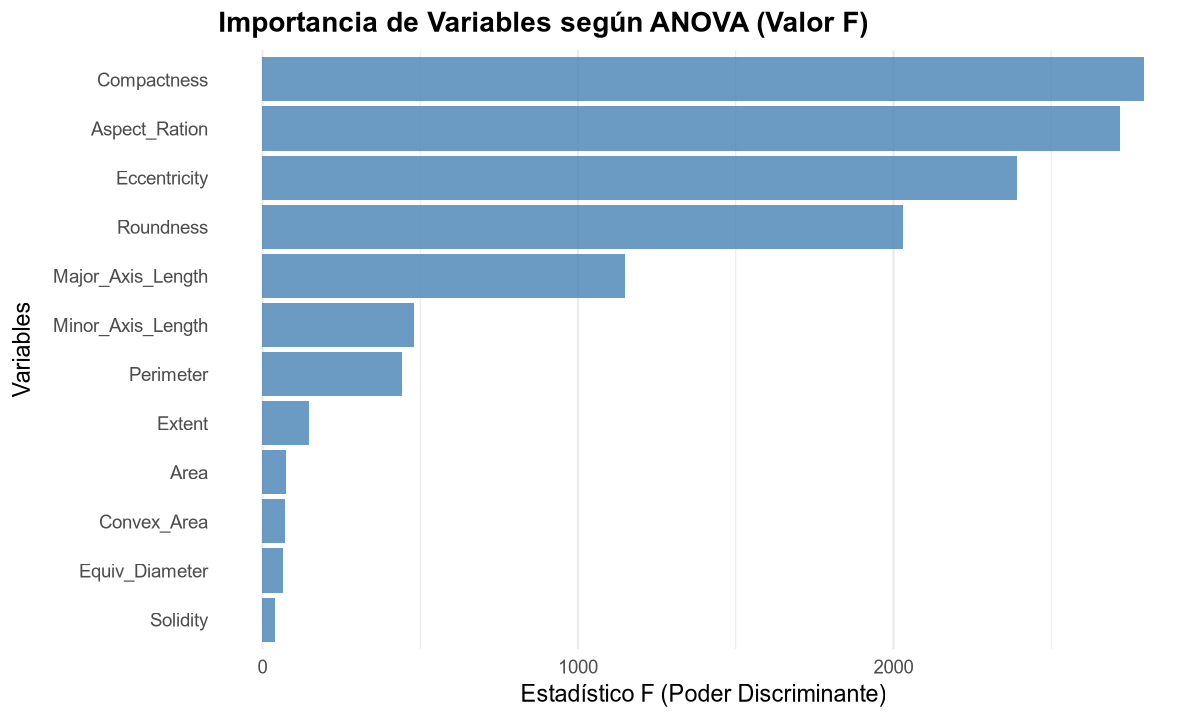

In [16]:
df_num <- df_seeds[, sapply(df_seeds, is.numeric)]
target <- df_seeds$Class

resultados_anova <- data.frame(
  Variable = character(),
  F_Value = numeric(),
  P_Value = numeric(),
  stringsAsFactors = FALSE
)

for (col in colnames(df_num)) {
  test_anova <- aov(df_num[[col]] ~ target)

  resumen <- summary(test_anova)[[1]]
  f_val <- resumen[["F value"]][1]
  p_val <- resumen[["Pr(>F)"]][1]

  resultados_anova <- rbind(
    resultados_anova,
    data.frame(Variable = col, F_Value = f_val, P_Value = p_val)
  )
}

resultados_anova <- resultados_anova[order(-resultados_anova$F_Value), ]

print("RANKING DE CAPACIDAD DISCRIMINANTE (ANOVA)")
print(resultados_anova)

options(repr.plot.width = 10, repr.plot.height = 6)

ggplot(resultados_anova, aes(x = reorder(Variable, F_Value), y = F_Value)) +
  geom_bar(stat = "identity", fill = "#4682B4", alpha = 0.8) +
  coord_flip() +
  labs(
    title = "Importancia de Variables según ANOVA (Valor F)",
    x = "Variables",
    y = "Estadístico F (Poder Discriminante)"
  ) +
  theme_minimal(base_size = 14) +
  theme(
    panel.grid.major.y = element_blank(),
    plot.title = element_text(face = "bold")
  )

### Interpretación de los Resultados ANOVA

El análisis de varianza confirma con rotundidad la jerarquía de importancia de las variables. Observando el ranking del **Estadístico F**, podemos dividir los atributos en tres niveles de capacidad discriminante:

**1. La Supremacía de la Forma (F > 2000):**
Los resultados son inequívocos: las cuatro variables más potentes son descriptores de forma pura, independientes del tamaño.

* **`Compactness` (F = 2795):** Se erige como la **variable reina** del dataset. Su capacidad para diferenciar entre las medias de las dos clases es inmensamente superior al resto.
* **`Aspect_Ration` (F = 2716):** Sigue muy de cerca a la compacidad. Esto valida biológicamente que la diferencia clave entre *Çerçevelik* y *Ürgüp Sivrisi* es la elongación: una es redonda y la otra alargada.
* *Nota:* Dado que la correlación entre Compactness y Aspect_Ration era muy alta (-0.99), el ANOVA confirma que ambas portan prácticamente la misma señal discriminante de altísima calidad.

**2. El Rendimiento Moderado de las Dimensiones Lineales (F ~ 400 - 1100):**

* **`Major_Axis_Length` (F = 1149):** Tiene un buen poder predictivo, lo cual es lógico (las semillas alargadas tienen un eje mayor más largo), pero es menos de la mitad de potente que la `Compactness`.
* **`Perimeter` (F = 443):** Su valor F cae drásticamente. El perímetro empieza a ser una variable "sucia" porque mezcla información de forma y tamaño.

**3. La Debilidad del Tamaño y la Textura (F < 150):**
Aquí es donde el ANOVA confirma la hipótesis del PCA (la mezcla vertical de las clases).

* **`Area` (F = 74.5):** Su valor F es **37 veces menor** que el de `Compactness`. Aunque el p-value indica significancia estadística (debido al tamaño de la muestra), a efectos prácticos de clasificación, el Área es un predictor muy pobre con mucho solapamiento entre clases.
* **`Solidity` (F = 38.1):** Ocupa la última posición. Confirma que la regularidad o suavidad del borde es prácticamente idéntica en ambas variedades y no aporta valor al modelo.

### <font color='#3d59c6'>  3.5 Selección Definitiva de Variables para el Modelo </font>

Tras la triangulación de resultados (Correlaciones, PCA y ANOVA), se procede a la selección final de predictores para la Regresión Logística bajo el criterio de **independencia y poder discriminante**:

1. **Variable Principal (Forma): `Compactness`**
* Fue la variable con mayor estadístico F en el ANOVA (2795) y mayor ganancia de información (IGA).
    * *Descarte:* Se eliminan `Aspect_Ration` y `Eccentricity` por ser redundantes (correlación > 0.95 con Compactness). `Compactness` es el mejor representante de la "forma".

2. **Variable Secundaria (Tamaño): `Area`**
* Aunque el ANOVA mostró que el tamaño es un discriminante débil, es necesario incluir una variable dimensional para capturar información ortogonal a la forma.
    * *Independencia:* La correlación entre `Area` y `Compactness` es muy baja (**-0.16**). Esto es excelente para la Regresión Logística, ya que aporta información nueva sin introducir ruido por multicolinealidad.
    * *Descarte:* Se eliminan `Perimeter`, `Major_Axis_Length`, etc., porque están fuertemente correlacionadas entre sí o con la forma.

>#### **Decisión Final:**
>
>El modelo de Regresión Logística se entrenará utilizando exclusivamente:
>
>$$X = [\text{Compactness}, \text{Area}]$$
>
>Esta combinación garantiza un modelo robusto, interpretable y libre de problemas matemáticos de colinealidad.

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


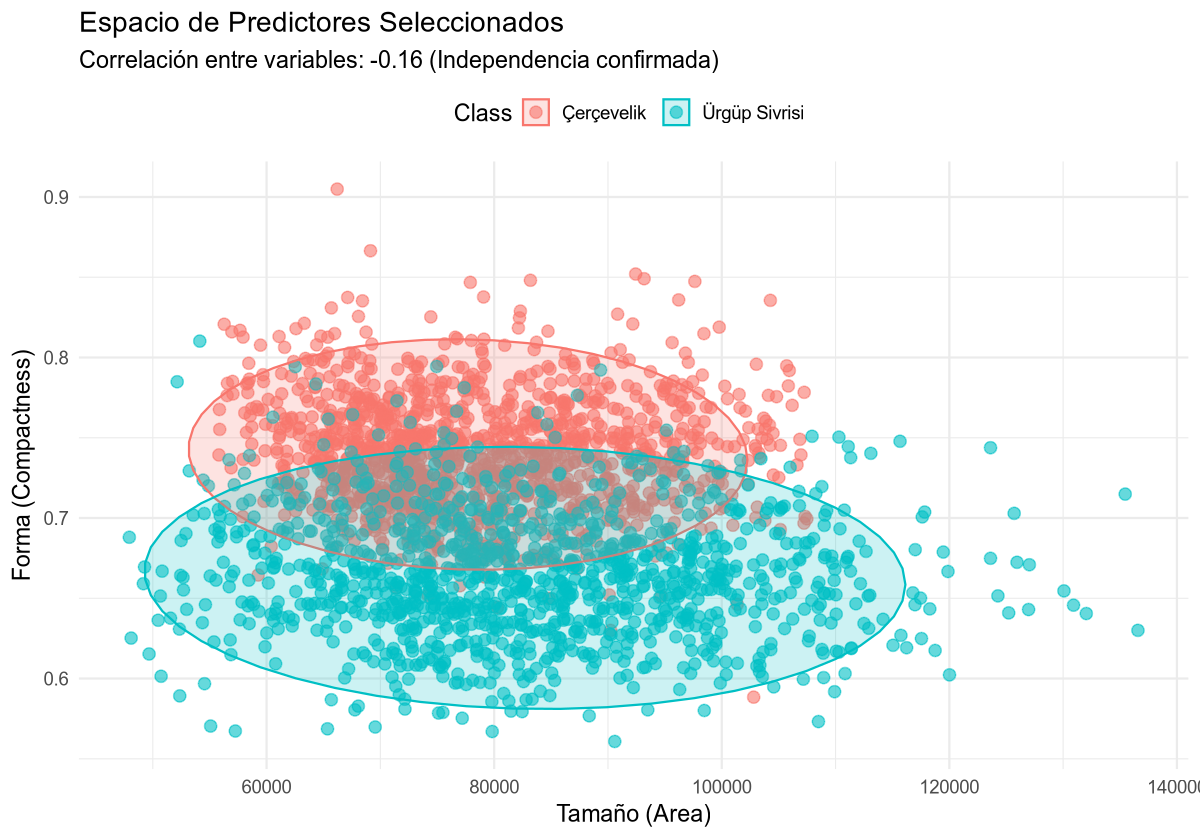

In [17]:
var_x <- "Area"
var_y <- "Compactness"

options(repr.plot.width = 10, repr.plot.height = 7)

ggplot(df_seeds, aes_string(
  x = var_x, y = var_y,
  color = "Class", fill = "Class"
)) +
  geom_point(alpha = 0.6, size = 3) +
  stat_ellipse(geom = "polygon", alpha = 0.2, level = 0.95) +
  labs(
    title = "Espacio de Predictores Seleccionados",
    subtitle = paste(
      "Correlación entre variables:",
      round(cor(df_seeds[[var_x]], df_seeds[[var_y]]), 2),
      "(Independencia confirmada)"
    ),
    x = "Tamaño (Area)",
    y = "Forma (Compactness)"
  ) +
  theme_minimal(base_size = 14) +
  theme(legend.position = "top")

El gráfico de dispersión entre **`Area`** y **`Compactness`** valida definitivamente la estrategia de selección de predictores para el modelo de Regresión Logística. La visualización revela tres fenómenos cruciales que garantizan la robustez del modelo:

**1. Independencia (Ortogonalidad):**

Tal y como indicaba la matriz de correlación, el coeficiente entre ambas variables es de apenas **-0.16**. Visualmente, esto se traduce en una nube de puntos dispersa y no en una línea diagonal.
   * Al no estar correlacionadas, `Area` y `Compactness` aportan información **distinta** y complementaria. El modelo recibirá dos señales independientes: "cuánto ocupa" (Tamaño) y "cuán redonda es" (Forma).

**2. Separabilidad Vertical (El poder de la Forma):**

El eje Y (`Compactness`) actúa como el discriminante principal.
   * La clase ***Çerçevelik* (Naranja)** se agrupa claramente en la parte **superior** del gráfico (alta compacidad, formas redondas).
   * La clase ***Ürgüp Sivrisi* (Azul)** cae hacia la parte **inferior** (baja compacidad, formas irregulares).
   * Existe una franja de separación vertical muy nítida que facilitará al algoritmo trazar la frontera de decisión.

**3. Distribución Horizontal (El contexto del Tamaño):**

Aunque el eje X (`Area`) muestra solapamiento (hay semillas de ambos tipos en el rango central de tamaños), se observa una tendencia clara: las semillas naranjas tienden a concentrarse a la izquierda (menor tamaño) y las azules se extienden hacia la derecha (mayor tamaño).
   * Aunque el Área por sí sola no separa bien, combinada con la Compacidad ayuda a distinguir los casos extremos (semillas muy grandes y deformes vs. semillas muy pequeñas y redondas).

## <font color='#3d59c6'>  4. MODELO REGRESIÓN LOGÍSTICA </font>

### Definición del Modelo y Variables

En esta etapa final, construiremos un clasificador binario supervisado utilizando el algoritmo de **Regresión Logística**. Este algoritmo es ideal para estimar la probabilidad de que una semilla pertenezca a la clase *Ürgüp Sivrisi* ($Y=1$) o *Çerçevelik* ($Y=0$) en función de sus características geométricas.

### Justificación de la Dimensionalidad del Modelo

Antes de proceder al entrenamiento de la Regresión Logística, es fundamental justificar la reducción del dataset de 12 a solo 2 variables predictoras (`Compactness` y `Area`). Esta decisión se sustenta en el **Principio de Parsimonia** (o Navaja de Ockham), que establece que, ante igualdad de condiciones, la explicación más simple suele ser la correcta.

La elección de este subconjunto de características no es arbitraria, sino el resultado de la convergencia de tres pruebas estadísticas:

1. **Suficiencia de Información (PCA):** El análisis de componentes principales demostró que el **83.22%** de la variabilidad de las semillas se explica con solo dos dimensiones (Forma y Tamaño). Al elegir una variable representativa de cada dimensión, capturamos la esencia del problema sin arrastrar el ruido de las 10 variables restantes.
2. **Estabilidad Matemática (Correlaciones):** La Regresión Logística es altamente sensible a la multicolinealidad. Al descartar variables redundantes (como *Aspect_Ration* o *Perimeter*) y quedarnos con dos variables independientes (correlación de -0.16), garantizamos que los coeficientes del modelo sean estables y fiables.
3. **Prevención del Sobreajuste:** Un modelo con menos variables generaliza mejor. Al obligar al algoritmo a aprender patrones basándose solo en la "Compacidad" y el "Área", evitamos que memorice peculiaridades irrelevantes del set de entrenamiento, asegurando un mejor rendimiento ante nuevos datos reales.

>**En conclusión:** El modelo propuesto será minimalista, altamente interpretable y estadísticamente robusto.

### Metodología de Validación

Para evaluar la capacidad de generalización del modelo y evitar el sobreajuste (*overfitting*), se aplicará el siguiente protocolo:

1. **Partición de Datos:** El dataset se dividirá aleatoriamente en dos subconjuntos:
    * **Entrenamiento (Training Set - 70%):** Utilizado para ajustar los coeficientes del modelo ().
    * **Prueba (Test Set - 30%):** Utilizado exclusivamente para evaluar el rendimiento ante datos no vistos.

2. **Métricas de Evaluación:** Se calculará la **Matriz de Confusión** y se reportarán tres indicadores clave:
    * **Accuracy (Exactitud):** Porcentaje global de aciertos.
    * **Sensibilidad (Sensitivity):** Capacidad del modelo para detectar correctamente la clase positiva.
    * **Especificidad (Specificity):** Capacidad para clasificar correctamente la clase negativa.

In [18]:
df_model <- df_seeds[, c("Compactness", "Area", "Class")]

df_model$Class <- as.factor(df_model$Class)

set.seed(123)
train_index <- createDataPartition(df_model$Class, p = 0.7, list = FALSE)

train_data <- df_model[train_index, ]
test_data <- df_model[-train_index, ]

print(paste("Muestras de Entrenamiento:", nrow(train_data)))
print(paste("Muestras de Test:", nrow(test_data)))

modelo_logistico <- glm(Class ~ Compactness + Area,
  data = train_data,
  family = "binomial"
)

print("Resumen del Modelo:")
summary(modelo_logistico)

probabilidades <- predict(modelo_logistico,
  newdata = test_data, type = "response"
)

clase_predicha <- ifelse(probabilidades > 0.5,
  levels(df_model$Class)[2], levels(df_model$Class)[1]
)
clase_predicha <- as.factor(clase_predicha)

conf_matrix <- confusionMatrix(
  data = clase_predicha,
  reference = test_data$Class
)

print("MATRIZ DE CONFUSIÓN Y MÉTRICAS")
print(conf_matrix)

acc <- conf_matrix$overall["Accuracy"]
sens <- conf_matrix$byClass["Sensitivity"]
spec <- conf_matrix$byClass["Specificity"]

cat("\nRESUMEN FINAL:\n")
cat(sprintf("Accuracy (Exactitud):    %.2f%%\n", acc * 100))
cat(sprintf("Sensibilidad (Recall):   %.2f%%\n", sens * 100))
cat(sprintf("Especificidad:           %.2f%%\n", spec * 100))

[1] "Muestras de Entrenamiento: 1750"
[1] "Muestras de Test: 750"
[1] "Resumen del Modelo:"



Call:
glm(formula = Class ~ Compactness + Area, family = "binomial", 
    data = train_data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept)  3.907e+01  1.941e+00  20.122  < 2e-16 ***
Compactness -5.778e+01  2.696e+00 -21.429  < 2e-16 ***
Area         1.902e-05  5.668e-06   3.356 0.000791 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2423.2  on 1749  degrees of freedom
Residual deviance: 1138.6  on 1747  degrees of freedom
AIC: 1144.6

Number of Fisher Scoring iterations: 6


[1] "MATRIZ DE CONFUSIÓN Y MÉTRICAS"
Confusion Matrix and Statistics

               Reference
Prediction      Çerçevelik Ürgüp Sivrisi
  Çerçevelik           341            55
  Ürgüp Sivrisi         49           305
                                          
               Accuracy : 0.8613          
                 95% CI : (0.8345, 0.8853)
    No Information Rate : 0.52            
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.722           
                                          
 Mcnemar's Test P-Value : 0.6239          
                                          
            Sensitivity : 0.8744          
            Specificity : 0.8472          
         Pos Pred Value : 0.8611          
         Neg Pred Value : 0.8616          
             Prevalence : 0.5200          
         Detection Rate : 0.4547          
   Detection Prevalence : 0.5280          
      Balanced Accuracy : 0.8608          
        

### Interpretación de los Resultados del Modelo

El modelo de Regresión Logística, entrenado con las variables `Compactness` y `Area`, ha arrojado resultados estadísticamente significativos y un rendimiento predictivo alto.

**Análisis de los Coeficientes ($\beta$):**
La tabla de coeficientes define la ecuación matemática que separa las clases.

* **Significancia (P-value):** Tanto el intercepto como las variables `Compactness` y `Area` presentan un p-value extremadamente bajo ($< 2e^{-16}$ y $0.00079$), marcado con tres asteriscos (`***`). Esto indica que ambas variables son determinantes reales para la clasificación y no fruto del azar.
* **Dirección del Efecto:**
    * **Compactness (-57.78):** El coeficiente negativo y de gran magnitud indica una fuerte relación inversa. Cuanto mayor es la compacidad (más redonda es la semilla), menor es la probabilidad de ser *Ürgüp Sivrisi* (y mayor la de ser *Çerçevelik*). Es el predictor dominante.
    * **Area (1.90e-05):** El coeficiente es positivo, lo que sugiere que a mayor tamaño, aumenta ligeramente la probabilidad de ser *Ürgüp Sivrisi*. Su valor es bajo debido a la escala de la variable (decenas de miles), pero su contribución es matemáticamente vital para ajustar la frontera de decisión.


**Rendimiento (Matriz de Confusión):**

El modelo alcanza una **Exactitud (Accuracy) del 86.13%**, clasificando correctamente 646 de las 750 semillas del set de prueba.

* **Equilibrio:** Destaca la consistencia entre **Sensibilidad (87.44%)** y **Especificidad (84.72%)**. Esto es crucial: el modelo no está sesgado hacia ninguna clase. Es igual de bueno detectando las semillas *Çerçevelik* que descartando las *Ürgüp Sivrisi*.
* **Errores:** Los 104 fallos (55 falsos positivos y 49 falsos negativos) confirman la existencia de la "zona de solapamiento" biológico detectada previamente en el PCA, donde las características físicas de ambas variedades se mezclan.

Setting levels: control = Çerçevelik, case = Ürgüp Sivrisi

Setting direction: controls < cases



Área Bajo la Curva (AUC): 0.9301

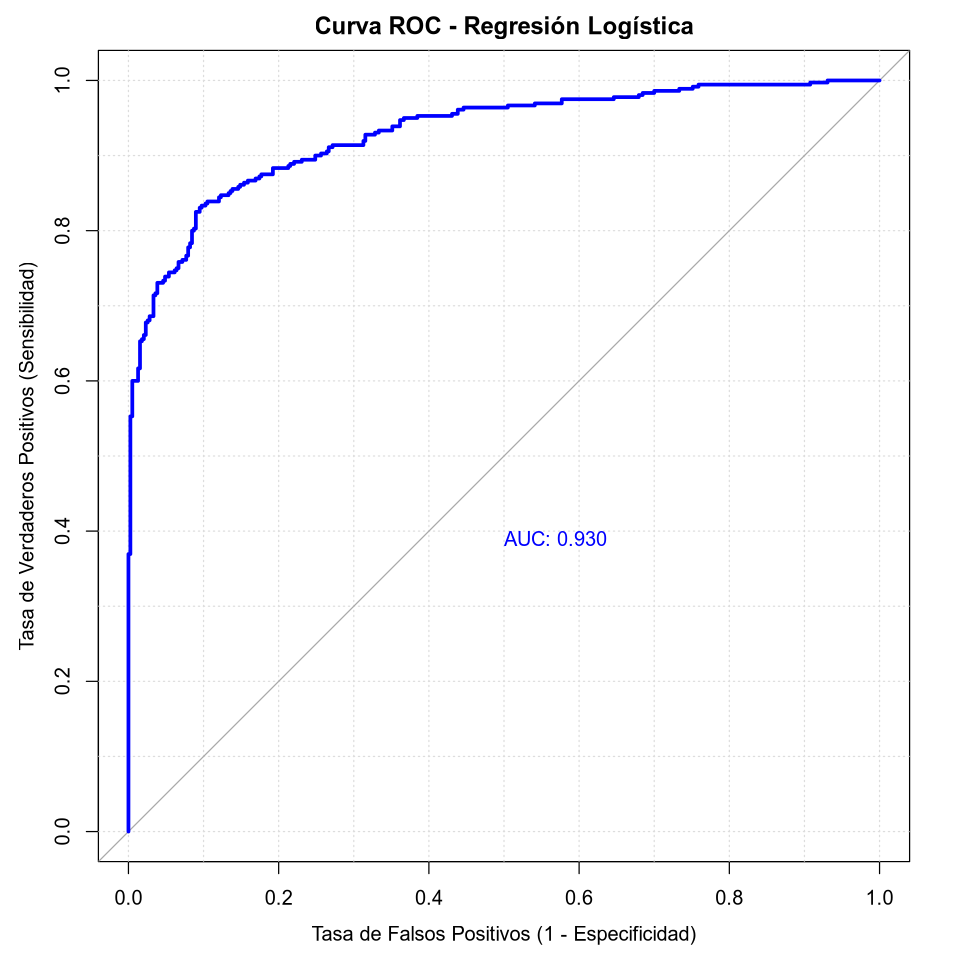

In [19]:
roc_curve <- roc(response = test_data$Class, predictor = probabilidades)

options(repr.plot.width = 8, repr.plot.height = 8)

plot(roc_curve,
  col = "blue",
  lwd = 3,
  main = "Curva ROC - Regresión Logística",
  legacy.axes = TRUE,
  xlab = "Tasa de Falsos Positivos (1 - Especificidad)",
  ylab = "Tasa de Verdaderos Positivos (Sensibilidad)",
  print.auc = TRUE,
  print.auc.y = 0.4,
  grid = TRUE
)

cat("Área Bajo la Curva (AUC):", round(auc(roc_curve), 4))

### Curva ROC y AUC: Evaluación de Robustez

Para validar la solidez del modelo más allá del umbral de decisión estándar (0.5), se ha generado la **Curva ROC (Receiver Operating Characteristic)** y calculado el **AUC (Area Under the Curve)**.

La matriz de confusión nos da una foto fija del rendimiento en un punto de corte específico. La curva ROC, en cambio, nos muestra la capacidad discriminante del modelo en **todos los umbrales posibles**.

* El **Eje Y** representa la Sensibilidad (cuántos positivos capturamos).
* El **Eje X** representa 1 - Especificidad (cuántas falsas alarmas aceptamos).
* El **AUC** es la nota final: 0.5 es azar (una moneda al aire) y 1.0 es la perfección.

**Nuestros resultados:**

* **AUC = 0.9301:** Este valor es **excelente**. Un AUC superior a 0.90 sitúa al modelo en un rango de rendimiento muy alto. Indica que, en el 93% de los casos, el modelo asignará una probabilidad más alta a una semilla *Çerçevelik* elegida al azar que a una *Ürgüp Sivrisi* aleatoria.
* **Análisis de la Curva:** La descripción visual ("recta subiendo casi a 90 grados") refleja un modelo muy potente. El ascenso vertical inicial significa que el modelo es capaz de capturar una gran cantidad de verdaderos positivos (aprox. un 60-70%) cometiendo muy pocos errores (Falsos Positivos cercanos a 0). Esto confirma que las variables elegidas (`Compactness` y `Area`) separan con gran nitidez la mayoría de las muestras, dejando la confusión solo para los casos límite.

## Propuestas de Mejora del Modelo

A la vista de los resultados (Accuracy 86% y AUC 0.93), el modelo es robusto, pero el análisis de los errores sugiere dos vías claras para intentar superar la barrera del 90% de exactitud:

**1. Implementación de Modelos No Lineales (SVM o Random Forest):**
La Regresión Logística traza una frontera de decisión **lineal** (una recta) para separar las clases. Sin embargo, en el gráfico del PCA observamos que la zona de solapamiento entre las semillas naranjas y azules no es perfectamente recta, sino una "nube" difusa.

* *Propuesta:* Utilizar **Support Vector Machines (SVM) con Kernel Radial** o **Random Forest**. Estos algoritmos pueden generar fronteras de decisión curvas o complejas, permitiendo "rodear" mejor los grupos de semillas y adaptarse a la zona de intersección de forma más flexible que una simple línea recta.

**2. Validación Cruzada (k-Fold Cross-Validation):**
Actualmente, la métrica del 86.13% depende de una única división de datos (70% Train - 30% Test). Existe el riesgo de que esta partición haya sido particularmente favorable o desfavorable ("suerte" en el reparto).

* *Propuesta:* Aplicar **10-Fold Cross-Validation**. Al entrenar y evaluar el modelo 10 veces rotando los datos, obtendremos una estimación mucho más fiable del error real. Esto asegurará que el modelo generaliza bien y que los resultados no son producto de la aleatoriedad de una sola partición.

### Mejora A: Implementación de Modelos No Lineales

### Exploración de Modelos No Lineales: SVM y Random Forest

Dado que el análisis PCA reveló una zona de solapamiento donde las clases no son linealmente separables, probaremos dos algoritmos capaces de trazar fronteras de decisión complejas para intentar reducir el error en esa "zona gris":

1. **Support Vector Machines (SVM) con Kernel Radial:**
A diferencia de la regresión logística (que traza una recta), el SVM con kernel RBF (Radial Basis Function) proyecta los datos a una dimensión superior para encontrar una separación óptima.  Esto le permite generar **curvas cerradas** alrededor de los grupos de datos, adaptándose mejor a la forma de las nubes de puntos que vimos en el gráfico de dispersión.
2. **Random Forest (Bosques Aleatorios):**
Este es un método de ensamble que crea multitud de árboles de decisión.


En lugar de usar una única fórmula matemática, el modelo formula cientos de preguntas del tipo *"¿Es el área > X y la compacidad < Y?"*. La decisión final se toma por votación mayoritaria, lo que suele ser muy efectivo para capturar excepciones y patrones no lineales sin caer en el sobreajuste.

In [20]:
set.seed(123)
modelo_svm <- svm(Class ~ Compactness + Area,
  data = train_data,
  kernel = "radial",
  probability = TRUE
)

pred_svm <- predict(modelo_svm, newdata = test_data)
cm_svm <- confusionMatrix(pred_svm, test_data$Class)

set.seed(123)
modelo_rf <- randomForest(Class ~ Compactness + Area,
  data = train_data,
  ntree = 500
)

pred_rf <- predict(modelo_rf, newdata = test_data)
cm_rf <- confusionMatrix(pred_rf, test_data$Class)

cat("RESULTADOS COMPARATIVOS (Accuracy)\n")
cat(sprintf(
  "Regresión Logística (Base):  %.2f%%\n",
  conf_matrix$overall["Accuracy"] * 100
))
cat(sprintf(
  "SVM (Kernel Radial):         %.2f%%\n",
  cm_svm$overall["Accuracy"] * 100
))
cat(sprintf(
  "Random Forest:               %.2f%%\n",
  cm_rf$overall["Accuracy"] * 100
))

RESULTADOS COMPARATIVOS (Accuracy)
Regresión Logística (Base):  86.13%
SVM (Kernel Radial):         87.33%
Random Forest:               86.00%


### Análisis de Resultados: Comparativa de Modelos

La experimentación con algoritmos no lineales arroja conclusiones reveladoras sobre la topología de los datos:

**1. El SVM (Support Vector Machine) es el Ganador (87.33%):**

* El SVM con kernel radial ha logrado mejorar la precisión en un **+1.2%** respecto al modelo base.
* Esta mejora confirma la hipótesis planteada tras el PCA: la frontera de separación entre *Çerçevelik* y *Ürgüp Sivrisi* no es perfectamente recta. El SVM ha sido capaz de trazar una curva suave en la zona de solapamiento, capturando correctamente algunas de las semillas "difíciles" que la Regresión Logística fallaba. Aunque la mejora parece modesta, en contextos de producción un 1.2% es significativo.

**2. Random Forest no supera al modelo lineal (86.00%):**

* El modelo de ensamble ha obtenido un resultado prácticamente idéntico (incluso una décima inferior) a la Regresión Logística.
* Esto sugiere que la estructura del problema es fundamentalmente simple (dos grandes nubes). Al tener solo 2 variables predictoras, el Random Forest no encuentra interacciones complejas ocultas que explotar. Esto refuerza la idea de que la limitación principal no es el algoritmo, sino el **solapamiento biológico inevitable** entre las clases.

>**3. Conclusión de Parsimonia:**
Aunque el SVM es técnicamente superior, la **Regresión Logística** se mantiene extremadamente competitiva (86.13%). Esto valida nuestra elección inicial: un modelo simple, interpretable y rápido es capaz de capturar casi toda la información disponible, quedándose muy cerca de modelos mucho más complejos de "Caja Negra".

### Mejora B: Validación Cruzada (Cross-Validation)

### Validación Cruzada (k-Fold Cross-Validation)

Hasta ahora, hemos medido la precisión basándonos en una única división de datos (70% entrenar / 30% probar). Para asegurar que nuestros resultados (ese ~86% de acierto) son robustos y no fruto de la suerte en el reparto aleatorio, aplicaremos **10-Fold Cross-Validation**.

**¿En qué consiste?**
El algoritmo dividirá el dataset total en 10 partes iguales ("folds").

1. Entrenará con 9 partes y probará con 1.
2. Repetirá el proceso 10 veces, cambiando la parte de prueba en cada iteración.
3. Finalmente, calculará el promedio de las 10 pruebas.

Esto nos dará una estimación mucho más realista del rendimiento del modelo en el mundo real. Compararemos la estabilidad de los tres modelos (Logística, SVM y RF) bajo este riguroso test.

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .

[1] "RESULTADOS PROMEDIO TRAS 10-FOLD CV"



Call:
summary.resamples(object = resultados_cv)

Models: Logistica, SVM, RandomForest 
Number of resamples: 10 

Accuracy 
              Min. 1st Qu. Median   Mean 3rd Qu.  Max. NA's
Logistica    0.824   0.852  0.876 0.8680   0.880 0.908    0
SVM          0.836   0.873  0.880 0.8780   0.891 0.900    0
RandomForest 0.808   0.844  0.864 0.8616   0.876 0.912    0

Kappa 
                  Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Logistica    0.6476618 0.7029544 0.7509830 0.7353589 0.7595764 0.8151720    0
SVM          0.6711582 0.7445505 0.7587637 0.7549012 0.7806463 0.7989707    0
RandomForest 0.6141479 0.6866942 0.7267277 0.7221680 0.7516809 0.8233783    0


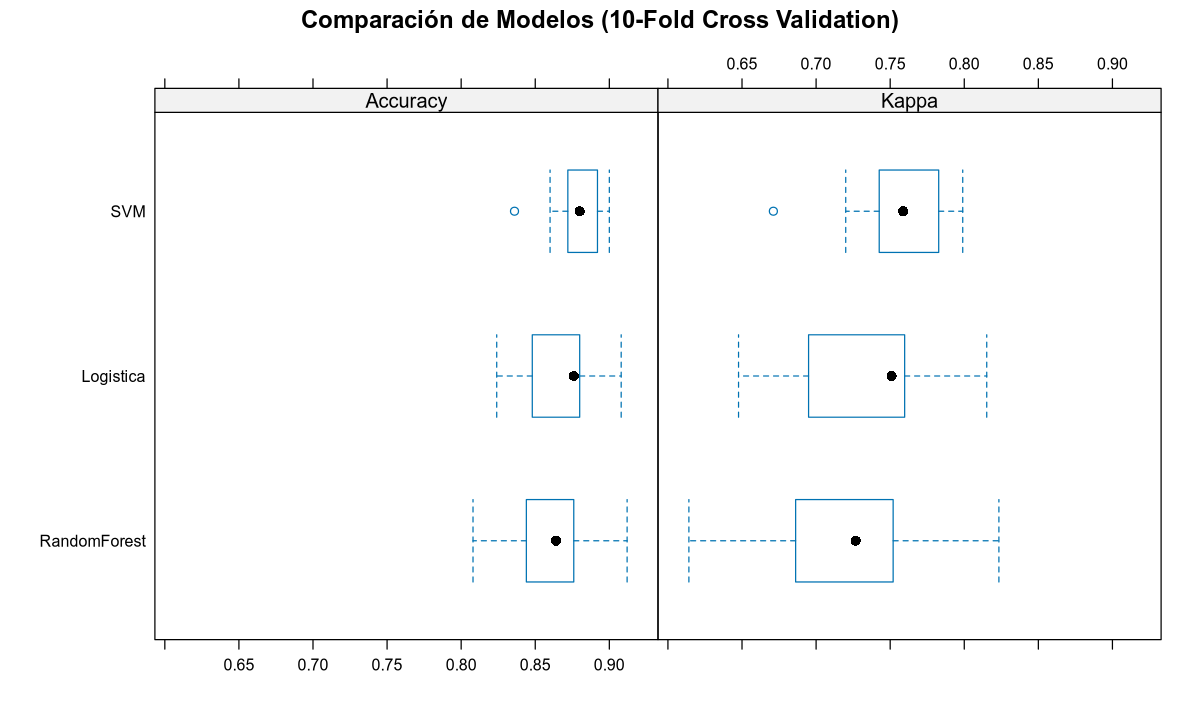

In [21]:
ctrl <- trainControl(method = "cv", number = 10)

set.seed(123)
cv_log <- train(Class ~ Compactness + Area,
  data = df_model,
  method = "glm", family = "binomial",
  trControl = ctrl
)

set.seed(123)
cv_svm <- train(Class ~ Compactness + Area,
  data = df_model,
  method = "svmRadial",
  trControl = ctrl,
  tuneLength = 5
)

set.seed(123)
cv_rf <- train(Class ~ Compactness + Area,
  data = df_model,
  method = "rf",
  trControl = ctrl,
  tuneLength = 5
)

resultados_cv <- resamples(list(
  Logistica = cv_log, SVM =
    cv_svm, RandomForest = cv_rf
))

print("RESULTADOS PROMEDIO TRAS 10-FOLD CV")
summary(resultados_cv)

options(repr.plot.width = 10, repr.plot.height = 6)
bwplot(resultados_cv,
  main =
    "Comparación de Modelos (10-Fold Cross Validation)"
)

### Análisis Comparativo Final (Validación Cruzada)

Tras ejecutar una validación cruzada de 10 iteraciones (10-Fold CV) para mitigar el sesgo de partición, los resultados confirman la jerarquía de rendimiento entre los modelos evaluados:

**1. El Ganador: Support Vector Machine (Kernel Radial)**

* **Accuracy Promedio:** **87.80%** (Rango: 83.6% - 90.0%)
* **Análisis:** El SVM se consolida como el algoritmo más preciso. Su capacidad para trazar fronteras de decisión no lineales le permite rascar un **+1% de exactitud adicional** frente a la regresión logística. Esto confirma que gestionar la "curvatura" de la zona de solapamiento aporta una mejora real, aunque marginal.
* **Estabilidad:** Es el modelo más estable (menor rango entre el mínimo y el máximo), lo que garantiza una predicción fiable en cualquier subconjunto de datos.

**2. La Sorpresa: Robustez de la Regresión Logística**

* **Accuracy Promedio:** **86.80%** (Rango: 82.4% - 90.8%)
* **Análisis:** A pesar de ser el modelo más simple, se queda a tan solo un punto porcentual del SVM. Esto valida nuestra selección de variables (`Compactness` + `Area`): la señal discriminante es tan fuerte que una simple línea recta captura casi toda la información disponible. La "Parsimonia" ha funcionado.

**3. El Perdedor: Random Forest**

* **Accuracy Promedio:** **86.16%** (Rango: 80.8% - 91.2%)
* **Análisis:** El Random Forest no logra superar a los modelos más simples e incluso muestra mayor inestabilidad (su mínimo cae al 80.8%). Al tener solo 2 variables predictoras, este algoritmo no puede explotar su ventaja principal (encontrar interacciones complejas entre muchas variables), resultando en un modelo innecesariamente pesado que no aporta valor añadido.

## <font color='#3d59c6'> CONCLUSIÓN FINAL DEL PROYECTO </font>

1. **Variables Determinantes:** La morfología (**`Compactness`**) es el factor crítico para distinguir entre las variedades *Çerçevelik* y *Ürgüp Sivrisi*, siendo el tamaño (**`Area`**) un factor secundario pero útil para el contexto.

3. **Modelo Recomendado:**
    * Si se prioriza la **precisión absoluta**, el modelo **SVM con Kernel Radial** es la elección óptima (**87.8%** de acierto).
    * Si se prioriza la **interpretabilidad y sencillez**, la **Regresión Logística** es una alternativa excelente (**86.8%**), ofreciendo resultados casi idénticos con una ecuación matemática transparente.

3. **Límite Biológico:** Ningún modelo ha logrado superar consistentemente la barrera del 90-91%. Esto sugiere que existe un solapamiento fenotípico natural de aproximadamente un **10%** entre ambas poblaciones, donde las semillas son físicamente indistinguibles utilizando solo estas métricas geométricas.